# MGR ASMR HRV porządek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hrvanalysis 
from hrvanalysis import get_frequency_domain_features
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values
from scipy.signal import welch
%matplotlib notebook

plan
1. wczytanie
2. wstepna obrobka sygnałow
3. lf/hf
4. wspólny plot good i bad
5. srednie good i bad z błedami


In [2]:
justyna="abc"
print(f"{justyna=}".split('=')[0])

justyna


In [3]:
def interpol(syg):
    # This remove outliers from signal
    rr_intervals_without_outliers = remove_outliers(rr_intervals=syg, low_rri=300, high_rri=2000)
    # This replace outliers nan values with linear interpolation
    #interpolacja = średnia arytmetyczna z sąsiadów
    interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers, interpolation_method="linear")
    # This remove ectopic beats from signal
    nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")

    # This replace ectopic beats nan values with linear interpolation
    syg_new = interpolate_nan_values(rr_intervals=nn_intervals_list)
    
    return syg_new

def norma(syg):
    return syg-np.mean(syg)

def separator(syg):
    t = np.arange(len(syg))
    syg1 = syg[:int(np.median(t))] #before
    syg2 = syg[int(np.median(t)):] #asmr
    return syg1, syg2

def lfhf(syg):
    frequency_domain_features = get_frequency_domain_features(syg)

    #print(frequency_domain_features)

    for el in frequency_domain_features:
        print(el, ": ", frequency_domain_features[el], end ="\n")

def analiza1 (syg):
    syg = interpol(syg)
    syg_before, syg_asmr = separator(syg)
    print("BEFORE")
    lfhf(syg_before)
    print("ASMR")
    lfhf(syg_asmr)
    syg_before = norma(syg_before)
    syg_asmr = norma(syg_asmr)
        
    return syg_before, syg_asmr
    
    
def widmo1(syg, c='b'):
    global f
    f, P = welch(syg, fs=1.0, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=- 1, average='mean')
    plt.plot(f, P, color=c)
    plt.xlabel('frequency [Hz]') #?
    #plt.ylim((0,300000))
    plt.ylabel('PSD [s**2/Hz]') #?
    return P #f #!!!
        
    

Justyna

In [4]:
x1 = np.fromfile('Justyna_Ossibach-Sikora/asmr30min.txt', dtype = int, sep = ' ')
s1_good = x1[:1292]
s1_good_before, s1_good_asmr = analiza1(s1_good)

x2 = np.fromfile('Justyna_Ossibach-Sikora/asmr_bez.txt', dtype = int, sep = ' ')
s1_bad = x2[:1215]
s1_bad_before, s1_bad_asmr = analiza1(s1_bad)

0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  552.2652463139009
hf :  881.4109331309918
lf_hf_ratio :  0.6265695438472912
lfnu :  38.52091945391277
hfnu :  61.47908054608724
total_power :  1595.2030011627428
vlf :  161.52682171785014
ASMR
lf :  803.9517003372002
hf :  939.7132262280812
lf_hf_ratio :  0.8555287697334912
lfnu :  46.10700646028628
hfnu :  53.89299353971373
total_power :  2360.0961398952154
vlf :  616.4312133299338
0 outlier(s) have been deleted.
3 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  769.5776760048734
hf :  863.593251952404
lf_hf_ratio :  0.8911344249911853
lfnu :  47.121685968745396
hfnu :  52.878314031254604
total_power :  2171.1170388222235
vlf :  537.9461108649461
ASMR
lf :  771.1460371877716
hf :  490.6431611703664
lf_hf_ratio :  1.5717044447298554
lfnu :  61.11528282150459
hfnu :  38.88471717849541
total_power :  2615.843483464684
vlf :  1354.0542851065459


In [5]:
s2_good = np.fromfile('Justyna_Ossibach-Sikora/good2.txt', dtype = int, sep = ' ')
s3_good = np.fromfile('Justyna_Ossibach-Sikora/good3.txt', dtype = int, sep = ' ')
s4_good = np.fromfile('Justyna_Ossibach-Sikora/good4.txt', dtype = int, sep = ' ')
s5_good = np.fromfile('Justyna_Ossibach-Sikora/good5.txt', dtype = int, sep = ' ')
s2_bad = np.fromfile('Justyna_Ossibach-Sikora/bad2.txt', dtype = int, sep = ' ')
s3_bad = np.fromfile('Justyna_Ossibach-Sikora/bad3.txt', dtype = int, sep = ' ')
s4_bad = np.fromfile('Justyna_Ossibach-Sikora/bad4.txt', dtype = int, sep = ' ')
s5_bad = np.fromfile('Justyna_Ossibach-Sikora/bad5.txt', dtype = int, sep = ' ')

In [6]:
s2_good_before, s2_good_asmr = analiza1(s2_good)
s3_good_before, s3_good_asmr = analiza1(s3_good)
s4_good_before, s4_good_asmr = analiza1(s4_good)
s5_good_before, s5_good_asmr = analiza1(s5_good)

0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  703.4174392158895
hf :  555.9896549833811
lf_hf_ratio :  1.2651628189681248
lfnu :  55.853063116427926
hfnu :  44.146936883572074
total_power :  1667.2301282476224
vlf :  407.82303404835164
ASMR
lf :  1207.9965396263096
hf :  612.6404747851128
lf_hf_ratio :  1.971787025742988
lfnu :  66.35021314321857
hfnu :  33.64978685678144
total_power :  3066.5663650172237
vlf :  1245.9293506058013
0 outlier(s) have been deleted.
69 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  1251.920140382444
hf :  1261.214149630528
lf_hf_ratio :  0.9926309031255266
lfnu :  49.81509127297698
hfnu :  50.184908727023014
total_power :  3093.8623824045526
vlf :  580.7280923915806
ASMR
lf :  1241.462817039127
hf :  1138.2357912145721
lf_hf_ratio :  1.0906903706782975
lfnu :  52.168909656595254
hfnu :  47.83109034340474
total_power :  3253.9774643076544
vlf :  874.2788560539551
0 outlier(s) have been del

In [7]:
s2_bad_before, s2_bad_asmr = analiza1(s2_bad)
s3_bad_before, s3_bad_asmr = analiza1(s3_bad)
s4_bad_before, s4_bad_asmr = analiza1(s4_bad)
s5_bad_before, s5_bad_asmr = analiza1(s5_bad)

0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  664.3784174809784
hf :  998.3012057426066
lf_hf_ratio :  0.6655089803149813
lfnu :  39.95829432208286
hfnu :  60.041705677917136
total_power :  1847.054834495228
vlf :  184.37521127164308
ASMR
lf :  409.63051326060236
hf :  278.7280301510985
lf_hf_ratio :  1.4696423357153625
lfnu :  59.50830670748372
hfnu :  40.49169329251629
total_power :  977.3920241811727
vlf :  289.03348076947185
0 outlier(s) have been deleted.
18 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  550.272494128151
hf :  771.0872147081141
lf_hf_ratio :  0.713631977851494
lfnu :  41.64441298219859
hfnu :  58.35558701780141
total_power :  1657.2446182334452
vlf :  335.8849093971802
ASMR
lf :  535.0623849620522
hf :  473.7170728012377
lf_hf_ratio :  1.12949778609004
lfnu :  53.04057104299249
hfnu :  46.95942895700751
total_power :  1266.3470431987453
vlf :  257.5675854354555
0 outlier(s) have been deleted.
13 

<IPython.core.display.Javascript object>


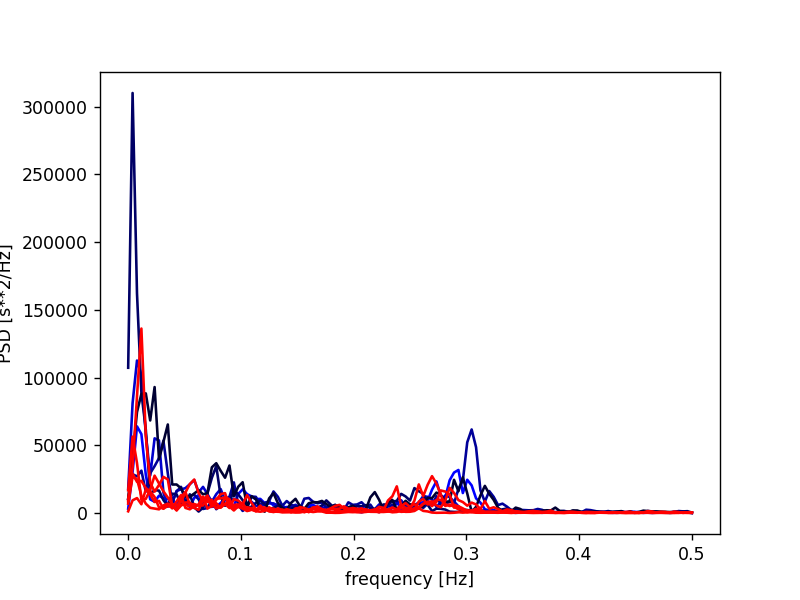

In [8]:
s= np.zeros((5,129))
s1= np.zeros((5,129))

plt.figure()
s[0,:] = widmo1(s1_good_asmr, [0,0,1])
s[1,:] = widmo1(s2_good_asmr, np.array([0,0,1])*0.8)
s[2,:]= widmo1(s3_good_asmr, np.array( [0,0,1])*0.6)
s[3,:] = widmo1(s4_good_asmr,  np.array([0,0,1])*0.4)
s[4,:] = widmo1(s5_good_asmr,  np.array([0,0,1])*0.2)

s1[0,:] = widmo1(s1_bad_asmr, 'r')
s1[1,:] = widmo1(s2_bad_asmr, 'r')
s1[2,:] = widmo1(s3_bad_asmr, 'r')
s1[3,:] = widmo1(s4_bad_asmr, 'r')
s1[4,:] = widmo1(s5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>


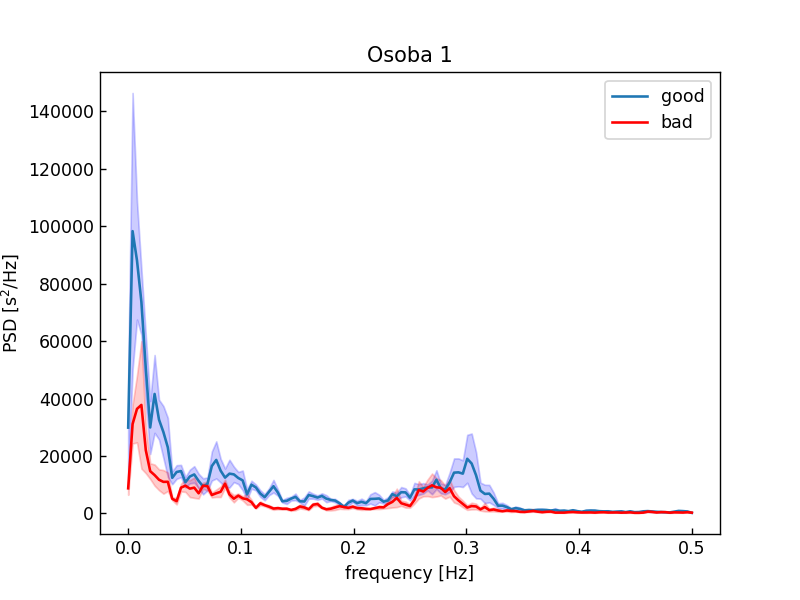

In [9]:
s_good_asmr_mean = np.mean(s,axis=0)
s_good_asmr_mean_err = np.std(s, axis=0)/np.sqrt(5)
#x = np.arange(len(s_good_asmr_mean))

s_bad_asmr_mean = np.mean(s1,axis=0)
s_bad_asmr_mean_err = np.std(s1, axis=0)/np.sqrt(5)
#x1 = np.arange(len(s_bad_asmr_mean))

plt.figure()
plt.plot(f, s_good_asmr_mean, label='good')
plt.fill_between(f, s_good_asmr_mean - s_good_asmr_mean_err, s_good_asmr_mean + s_good_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, s_bad_asmr_mean, 'r', label='bad')
plt.fill_between(f, s_bad_asmr_mean - s_bad_asmr_mean_err, s_bad_asmr_mean + s_bad_asmr_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 1')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

Przed i w trakcie uśrednione good

<IPython.core.display.Javascript object>


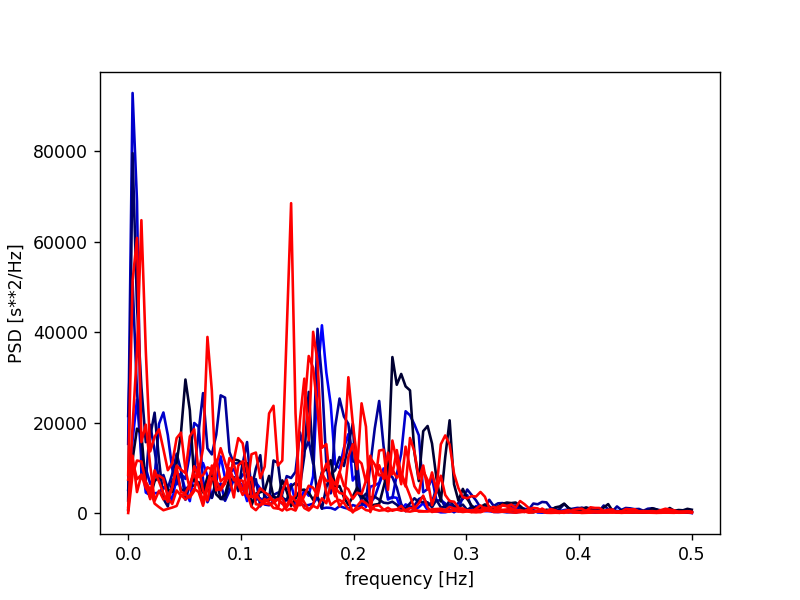

In [10]:
j= np.zeros((5,129))
j1= np.zeros((5,129))
plt.figure()
j[0,:] = widmo1(s1_good_before, [0,0,1])
j[1,:] = widmo1(s2_good_before, np.array([0,0,1])*0.8)
j[2,:]= widmo1(s3_good_before, np.array( [0,0,1])*0.6)
j[3,:] = widmo1(s4_good_before, np.array([0,0,1])*0.4)
j[4,:] = widmo1(s5_good_before, np.array([0,0,1])*0.2)
j1[0,:] = widmo1(s1_bad_before, 'r')
j1[1,:] = widmo1(s2_bad_before, 'r')
j1[2,:] = widmo1(s3_bad_before, 'r')
j1[3,:] = widmo1(s4_bad_before, 'r')
j1[4,:] = widmo1(s5_bad_before, 'r')
plt.show()

<IPython.core.display.Javascript object>


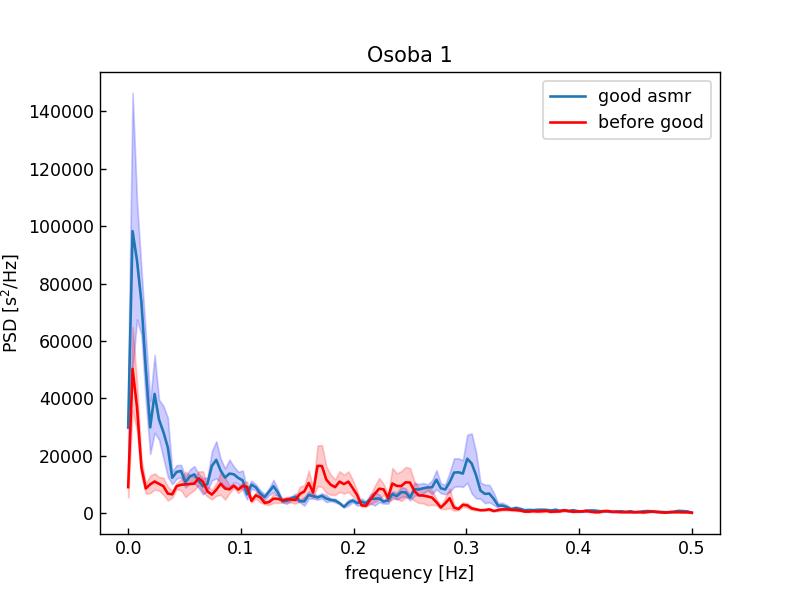

In [11]:
s_good_before_mean = np.mean(j,axis=0)
s_good_before_mean_err = np.std(j, axis=0)/np.sqrt(5)
#x = np.arange(len(s_good_asmr_mean))
plt.figure()
plt.plot(f, s_good_asmr_mean, label='good asmr')
plt.fill_between(f, s_good_asmr_mean - s_good_asmr_mean_err, s_good_asmr_mean + s_good_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, s_good_before_mean, 'r', label='before good')
plt.fill_between(f, s_good_before_mean - s_good_before_mean_err, s_good_before_mean + s_good_before_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 1')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

Przed i w trakcie uśrednione bad

<IPython.core.display.Javascript object>


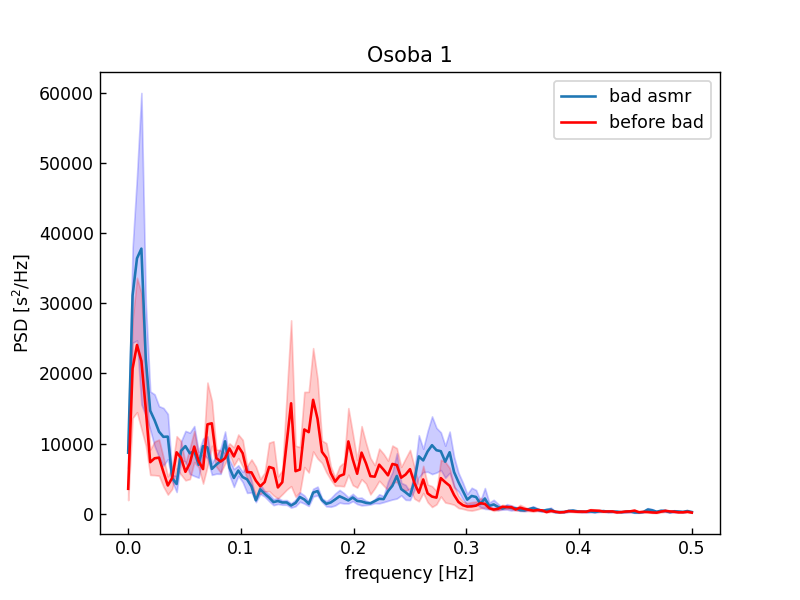

In [12]:
s_bad_before_mean = np.mean(j1,axis=0)
s_bad_before_mean_err = np.std(j1, axis=0)/np.sqrt(5)
#x1 = np.arange(len(s_bad_asmr_mean))
plt.figure()
plt.plot(f, s_bad_asmr_mean, label='bad asmr')
plt.fill_between(f, s_bad_asmr_mean - s_bad_asmr_mean_err, s_bad_asmr_mean + s_bad_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, s_bad_before_mean, 'r', label='before bad')
plt.fill_between(f, s_bad_before_mean - s_bad_before_mean_err, s_bad_before_mean + s_bad_before_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 1')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

PRZED vs W TRAKCIE (good i bad razem)

<IPython.core.display.Javascript object>


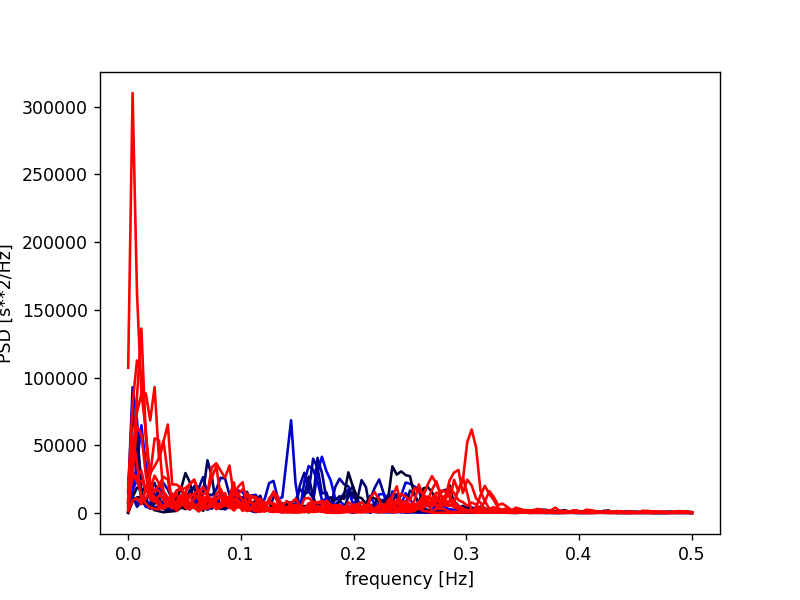

In [102]:
A= np.zeros((10,129))
B= np.zeros((10,129))

plt.figure()
A[0,:] = widmo1(s1_good_before, [0,0,1])
A[1,:] = widmo1(s2_good_before, np.array([0,0,1])*0.8)
A[2,:]= widmo1(s3_good_before, np.array( [0,0,1])*0.6)
A[3,:] = widmo1(s4_good_before,  np.array([0,0,1])*0.4)
A[4,:] = widmo1(s5_good_before,  np.array([0,0,1])*0.2)
A[5,:] = widmo1(s1_bad_before, [0,0,1])
A[6,:] = widmo1(s2_bad_before, np.array([0,0,1])*0.8)
A[7,:]= widmo1(s3_bad_before, np.array( [0,0,1])*0.6)
A[8,:] = widmo1(s4_bad_before,  np.array([0,0,1])*0.4)
A[9,:] = widmo1(s5_bad_before,  np.array([0,0,1])*0.2)

B[0,:] = widmo1(s1_good_asmr, 'r')
B[1,:] = widmo1(s2_good_asmr, 'r')
B[2,:] = widmo1(s3_good_asmr, 'r')
B[3,:] = widmo1(s4_good_asmr, 'r')
B[4,:] = widmo1(s5_good_asmr, 'r')
B[5,:] = widmo1(s1_bad_asmr, 'r')
B[6,:] = widmo1(s2_bad_asmr, 'r')
B[7,:] = widmo1(s3_bad_asmr, 'r')
B[8,:] = widmo1(s4_bad_asmr, 'r')
B[9,:] = widmo1(s5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>


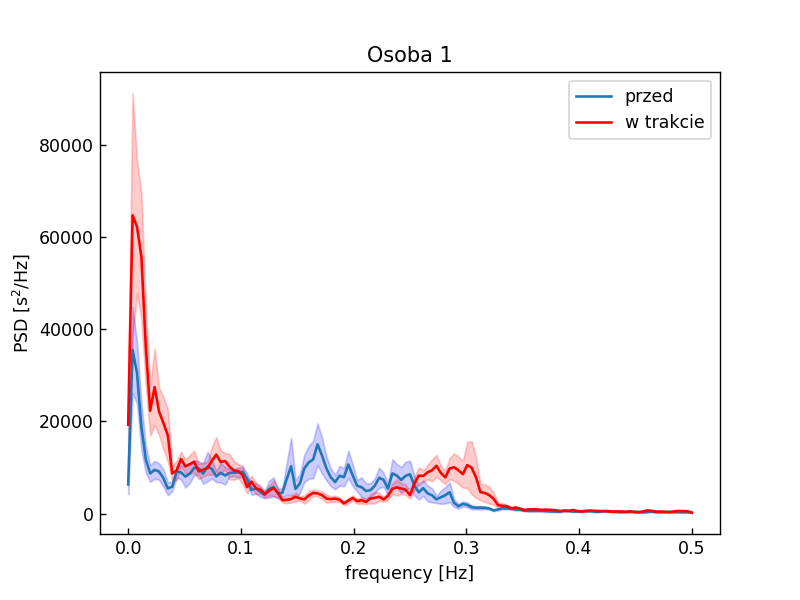

In [103]:
A_mean = np.mean(A,axis=0)
A_mean_err = np.std(A, axis=0)/np.sqrt(10)
#x = np.arange(len(e_good_asmr_mean))

B_mean = np.mean(B,axis=0)
B_mean_err = np.std(B, axis=0)/np.sqrt(10)
#x1 = np.arange(len(e_bad_asmr_mean))

plt.figure()
plt.plot(f, A_mean, label='przed')
plt.fill_between(f, A_mean - A_mean_err, A_mean + A_mean_err, color='b', alpha=0.2)
plt.plot(f, B_mean, 'r', label='w trakcie')
plt.fill_between(f, B_mean - B_mean_err, B_mean + B_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 1')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

GOOD vs W BAD (przed i w trakcie razem)

<IPython.core.display.Javascript object>


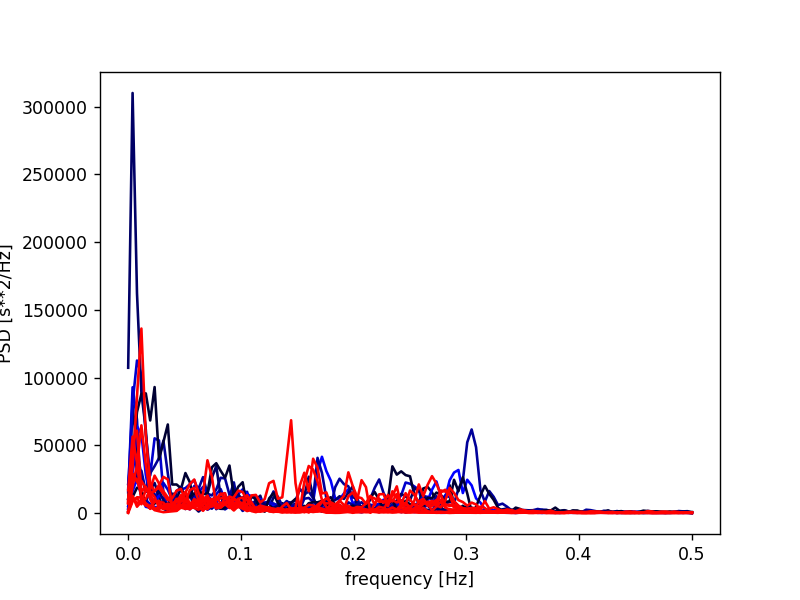

In [104]:
C= np.zeros((10,129))
D= np.zeros((10,129))

plt.figure()
C[0,:] = widmo1(s1_good_before, [0,0,1])
C[1,:] = widmo1(s2_good_before, np.array([0,0,1])*0.8)
C[2,:]= widmo1(s3_good_before, np.array( [0,0,1])*0.6)
C[3,:] = widmo1(s4_good_before,  np.array([0,0,1])*0.4)
C[4,:] = widmo1(s5_good_before,  np.array([0,0,1])*0.2)
C[5,:] = widmo1(s1_good_asmr, [0,0,1])
C[6,:] = widmo1(s2_good_asmr, np.array([0,0,1])*0.8)
C[7,:]= widmo1(s3_good_asmr, np.array( [0,0,1])*0.6)
C[8,:] = widmo1(s4_good_asmr,  np.array([0,0,1])*0.4)
C[9,:] = widmo1(s5_good_asmr,  np.array([0,0,1])*0.2)

D[0,:] = widmo1(s1_bad_before, 'r')
D[1,:] = widmo1(s2_bad_before, 'r')
D[2,:] = widmo1(s3_bad_before, 'r')
D[3,:] = widmo1(s4_bad_before, 'r')
D[4,:] = widmo1(s5_bad_before, 'r')
D[5,:] = widmo1(s1_bad_asmr, 'r')
D[6,:] = widmo1(s2_bad_asmr, 'r')
D[7,:] = widmo1(s3_bad_asmr, 'r')
D[8,:] = widmo1(s4_bad_asmr, 'r')
D[9,:] = widmo1(s5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>


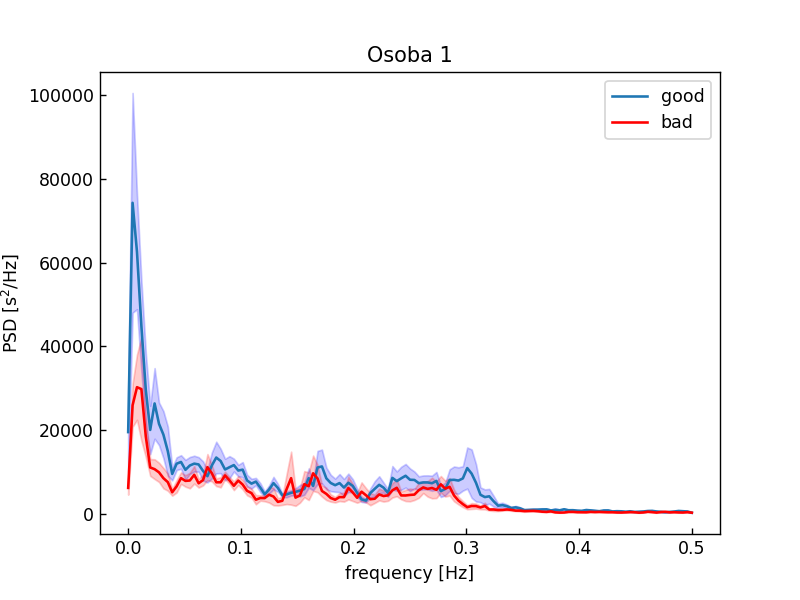

In [105]:
C_mean = np.mean(C,axis=0)
C_mean_err = np.std(C, axis=0)/np.sqrt(10)
#x = np.arange(len(e_good_asmr_mean))

D_mean = np.mean(D,axis=0)
D_mean_err = np.std(D, axis=0)/np.sqrt(10)
#x1 = np.arange(len(e_bad_asmr_mean))

plt.figure()
plt.plot(f, C_mean, label='good')
plt.fill_between(f, C_mean - C_mean_err, C_mean + C_mean_err, color='b', alpha=0.2)
plt.plot(f, D_mean, 'r', label='bad')
plt.fill_between(f, D_mean - D_mean_err, D_mean + D_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 1')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

Emila

In [13]:
e1_good = np.fromfile('Justyna_Ossibach-Sikora/egood1.txt', dtype = int, sep = ' ')
e2_good = np.fromfile('Justyna_Ossibach-Sikora/egood2.txt', dtype = int, sep = ' ')
e3_good = np.fromfile('Justyna_Ossibach-Sikora/egood3.txt', dtype = int, sep = ' ')
e4_good = np.fromfile('Justyna_Ossibach-Sikora/egood4.txt', dtype = int, sep = ' ')
e5_good = np.fromfile('Justyna_Ossibach-Sikora/egood5.txt', dtype = int, sep = ' ')
e1_bad = np.fromfile('Justyna_Ossibach-Sikora/ebad1.txt', dtype = int, sep = ' ')
e2_bad = np.fromfile('Justyna_Ossibach-Sikora/ebad2.txt', dtype = int, sep = ' ')
e3_bad = np.fromfile('Justyna_Ossibach-Sikora/ebad3.txt', dtype = int, sep = ' ')
e4_bad = np.fromfile('Justyna_Ossibach-Sikora/ebad4.txt', dtype = int, sep = ' ')
e5_bad = np.fromfile('Justyna_Ossibach-Sikora/ebad5.txt', dtype = int, sep = ' ')

In [14]:
e1_good_before, e1_good_asmr = analiza1(e1_good)
e2_good_before, e2_good_asmr = analiza1(e2_good)
e3_good_before, e3_good_asmr = analiza1(e3_good)
e4_good_before, e4_good_asmr = analiza1(e4_good)
e5_good_before, e5_good_asmr = analiza1(e5_good)

0 outlier(s) have been deleted.
288 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  1006.9405012733765
hf :  2232.2830327194615
lf_hf_ratio :  0.45108101728779393
lfnu :  31.08586025960884
hfnu :  68.91413974039116
total_power :  3937.4611520253316
vlf :  698.2376180324934
ASMR
lf :  1757.4475307560058
hf :  3673.705953819096
lf_hf_ratio :  0.4783854649360289
lfnu :  32.35864233532146
hfnu :  67.64135766467854
total_power :  6521.462082806398
vlf :  1090.308598231296
0 outlier(s) have been deleted.
72 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  416.41723811804616
hf :  973.8486479437438
lf_hf_ratio :  0.42759954434120784
lfnu :  29.95234525229073
hfnu :  70.04765474770927
total_power :  1913.3633586872215
vlf :  523.0974726254317
ASMR
lf :  1014.6972996798161
hf :  2154.8849516327186
lf_hf_ratio :  0.47088235448996835
lfnu :  32.013597352131384
hfnu :  67.9864026478686
total_power :  4090.503493352991
vlf :  920.9212420404563
0 outlier(s) have been d

In [15]:
e1_bad_before, e1_bad_asmr = analiza1(e1_bad)
e2_bad_before, e2_bad_asmr = analiza1(e2_bad)
e3_bad_before, e3_bad_asmr = analiza1(e3_bad)
e4_bad_before, e4_bad_asmr = analiza1(e4_bad)
e5_bad_before, e5_bad_asmr = analiza1(e5_bad)

0 outlier(s) have been deleted.
428 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  10012.164710776937
hf :  4021.0978072911903
lf_hf_ratio :  2.48990827644693
lfnu :  71.34595179051243
hfnu :  28.654048209487566
total_power :  16725.987644606066
vlf :  2692.725126537938
ASMR
lf :  11412.987455538114
hf :  2342.8410265208727
lf_hf_ratio :  4.871430594881822
lfnu :  82.96837569924254
hfnu :  17.031624300757446
total_power :  19672.680085489923
vlf :  5916.851603430935
0 outlier(s) have been deleted.
128 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  599.7795492658911
hf :  1501.756759305695
lf_hf_ratio :  0.39938528363487197
lfnu :  28.54005171452694
hfnu :  71.45994828547305
total_power :  2550.216175865361
vlf :  448.6798672937747
ASMR
lf :  685.559440657607
hf :  1328.3392511795616
lf_hf_ratio :  0.5161026748617359
lfnu :  34.04140652339413
hfnu :  65.95859347660587
total_power :  2730.95859089679
vlf :  717.0598990596218
0 outlier(s) have been delete

<IPython.core.display.Javascript object>


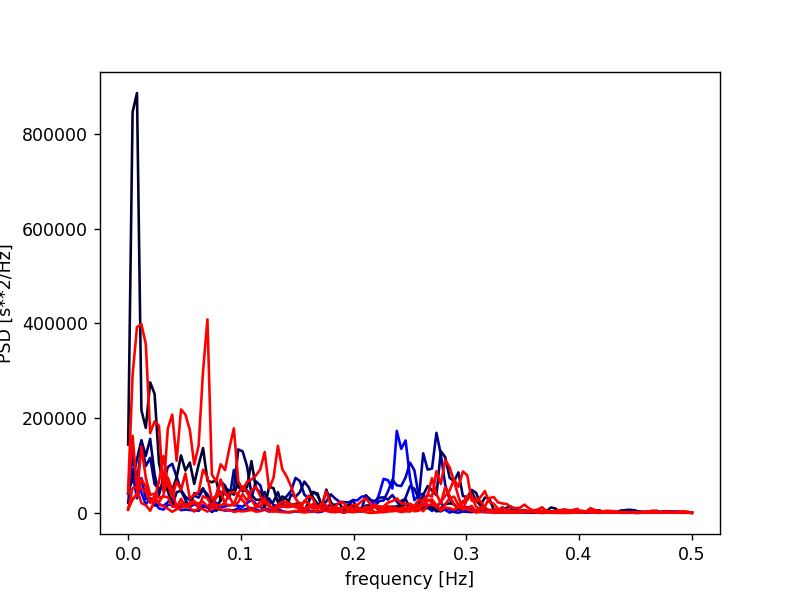

In [16]:
e= np.zeros((5,129))
e1= np.zeros((5,129))

plt.figure()
e[0,:] = widmo1(e1_good_asmr, [0,0,1])
e[1,:] = widmo1(e2_good_asmr, np.array([0,0,1])*0.8)
e[2,:]= widmo1(e3_good_asmr, np.array( [0,0,1])*0.6)
e[3,:] = widmo1(e4_good_asmr,  np.array([0,0,1])*0.4)
e[4,:] = widmo1(e5_good_asmr,  np.array([0,0,1])*0.2)

e1[0,:] = widmo1(e1_bad_asmr, 'r')
e1[1,:] = widmo1(e2_bad_asmr, 'r')
e1[2,:] = widmo1(e3_bad_asmr, 'r')
e1[3,:] = widmo1(e4_bad_asmr, 'r')
e1[4,:] = widmo1(e5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>


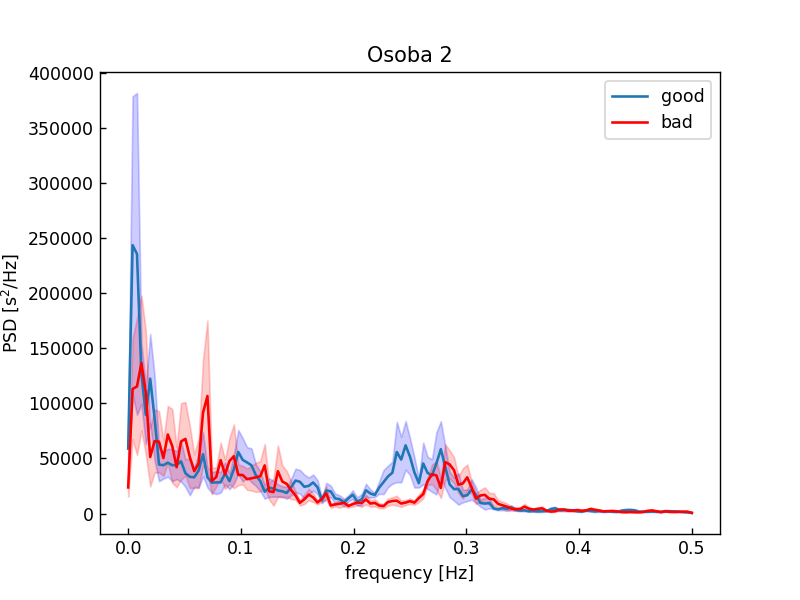

In [17]:
e_good_asmr_mean = np.mean(e,axis=0)
e_good_asmr_mean_err = np.std(e, axis=0)/np.sqrt(5)
#x = np.arange(len(e_good_asmr_mean))

e_bad_asmr_mean = np.mean(e1,axis=0)
e_bad_asmr_mean_err = np.std(e1, axis=0)/np.sqrt(5)
#x1 = np.arange(len(e_bad_asmr_mean))

plt.figure()
plt.plot(f, e_good_asmr_mean, label='good')
plt.fill_between(f, e_good_asmr_mean - e_good_asmr_mean_err, e_good_asmr_mean + e_good_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, e_bad_asmr_mean, 'r', label='bad')
plt.fill_between(f, e_bad_asmr_mean - e_bad_asmr_mean_err, e_bad_asmr_mean + e_bad_asmr_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 2')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

<IPython.core.display.Javascript object>


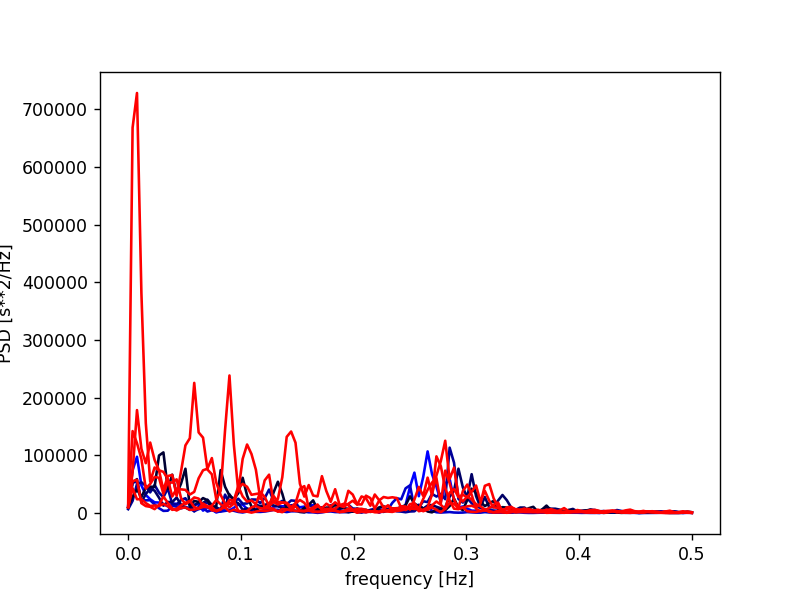

In [18]:
d= np.zeros((5,129))
d1= np.zeros((5,129))
plt.figure()
d[0,:] = widmo1(e1_good_before, [0,0,1])
d[1,:] = widmo1(e2_good_before, np.array([0,0,1])*0.8)
d[2,:]= widmo1(e3_good_before, np.array( [0,0,1])*0.6)
d[3,:] = widmo1(e4_good_before, np.array([0,0,1])*0.4)
d[4,:] = widmo1(e5_good_before, np.array([0,0,1])*0.2)
d1[0,:] = widmo1(e1_bad_before, 'r')
d1[1,:] = widmo1(e2_bad_before, 'r')
d1[2,:] = widmo1(e3_bad_before, 'r')
d1[3,:] = widmo1(e4_bad_before, 'r')
d1[4,:] = widmo1(e5_bad_before, 'r')
plt.show()

Przed i w trakcie uśrednione good

<IPython.core.display.Javascript object>


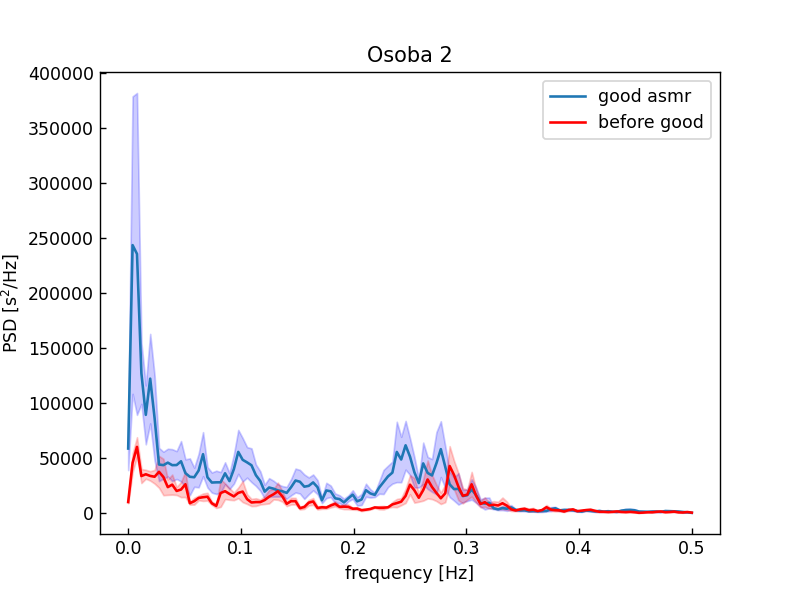

In [19]:
e_good_before_mean = np.mean(d,axis=0)
e_good_before_mean_err = np.std(d, axis=0)/np.sqrt(5)
#x = np.arange(len(s_good_asmr_mean))
plt.figure()
plt.plot(f, e_good_asmr_mean, label='good asmr')
plt.fill_between(f, e_good_asmr_mean - e_good_asmr_mean_err, e_good_asmr_mean + e_good_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, e_good_before_mean, 'r', label='before good')
plt.fill_between(f, e_good_before_mean - e_good_before_mean_err, e_good_before_mean + e_good_before_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 2')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

Przed i w trakcie uśrednione bad

<IPython.core.display.Javascript object>


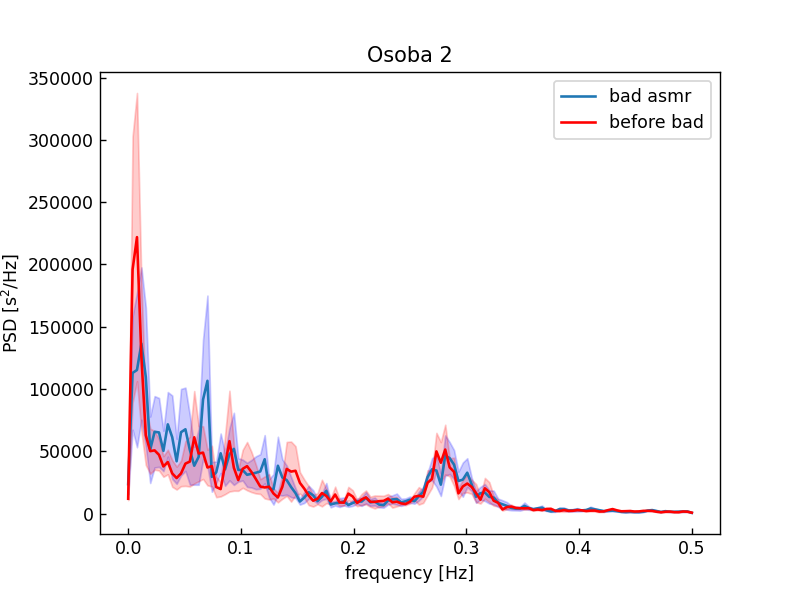

In [20]:
e_bad_before_mean = np.mean(d1,axis=0)
e_bad_before_mean_err = np.std(d1, axis=0)/np.sqrt(5)
#x1 = np.arange(len(s_bad_asmr_mean))
plt.figure()
plt.plot(f, e_bad_asmr_mean, label='bad asmr')
plt.fill_between(f, e_bad_asmr_mean - e_bad_asmr_mean_err, e_bad_asmr_mean + e_bad_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, e_bad_before_mean, 'r', label='before bad')
plt.fill_between(f, e_bad_before_mean - e_bad_before_mean_err, e_bad_before_mean + e_bad_before_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 2')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

PRZED vs W TRAKCIE (good i bad razem)

<IPython.core.display.Javascript object>


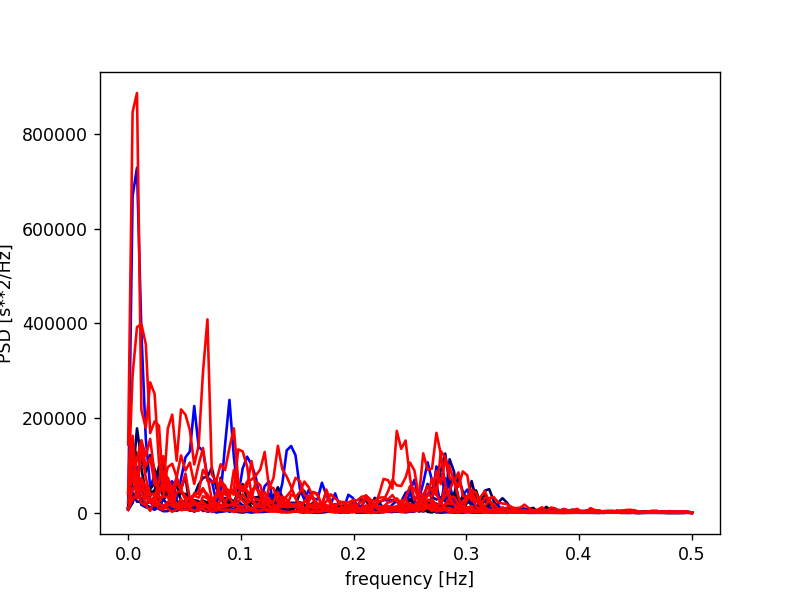

In [107]:
A= np.zeros((10,129))
B= np.zeros((10,129))

plt.figure()
A[0,:] = widmo1(e1_good_before, [0,0,1])
A[1,:] = widmo1(e2_good_before, np.array([0,0,1])*0.8)
A[2,:]= widmo1(e3_good_before, np.array( [0,0,1])*0.6)
A[3,:] = widmo1(e4_good_before,  np.array([0,0,1])*0.4)
A[4,:] = widmo1(e5_good_before,  np.array([0,0,1])*0.2)
A[5,:] = widmo1(e1_bad_before, [0,0,1])
A[6,:] = widmo1(e2_bad_before, np.array([0,0,1])*0.8)
A[7,:]= widmo1(e3_bad_before, np.array( [0,0,1])*0.6)
A[8,:] = widmo1(e4_bad_before,  np.array([0,0,1])*0.4)
A[9,:] = widmo1(e5_bad_before,  np.array([0,0,1])*0.2)

B[0,:] = widmo1(e1_good_asmr, 'r')
B[1,:] = widmo1(e2_good_asmr, 'r')
B[2,:] = widmo1(e3_good_asmr, 'r')
B[3,:] = widmo1(e4_good_asmr, 'r')
B[4,:] = widmo1(e5_good_asmr, 'r')
B[5,:] = widmo1(e1_bad_asmr, 'r')
B[6,:] = widmo1(e2_bad_asmr, 'r')
B[7,:] = widmo1(e3_bad_asmr, 'r')
B[8,:] = widmo1(e4_bad_asmr, 'r')
B[9,:] = widmo1(e5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>


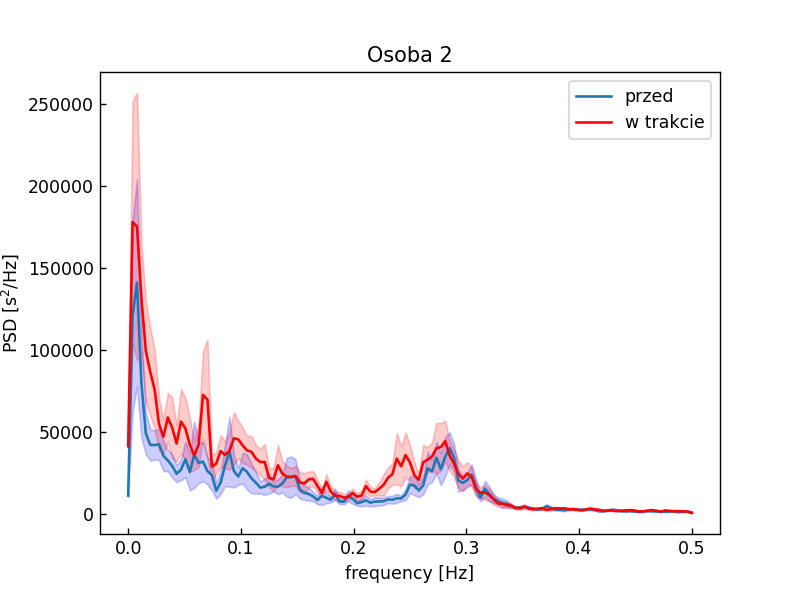

In [108]:
A_mean = np.mean(A,axis=0)
A_mean_err = np.std(A, axis=0)/np.sqrt(10)
#x = np.arange(len(e_good_asmr_mean))

B_mean = np.mean(B,axis=0)
B_mean_err = np.std(B, axis=0)/np.sqrt(10)
#x1 = np.arange(len(e_bad_asmr_mean))

plt.figure()
plt.plot(f, A_mean, label='przed')
plt.fill_between(f, A_mean - A_mean_err, A_mean + A_mean_err, color='b', alpha=0.2)
plt.plot(f, B_mean, 'r', label='w trakcie')
plt.fill_between(f, B_mean - B_mean_err, B_mean + B_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 2')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

GOOD vs BAD (przed i w trakcie razem)

<IPython.core.display.Javascript object>


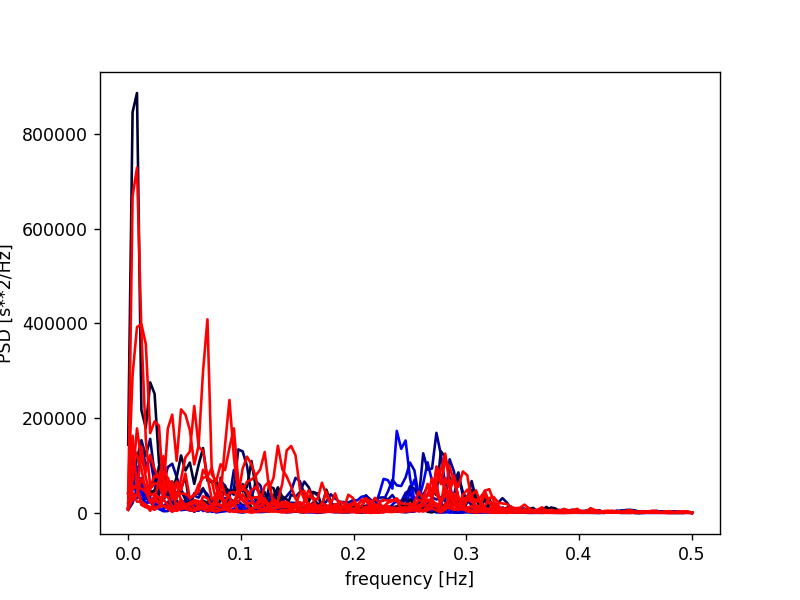

In [109]:
C= np.zeros((10,129))
D= np.zeros((10,129))

plt.figure()
C[0,:] = widmo1(e1_good_before, [0,0,1])
C[1,:] = widmo1(e2_good_before, np.array([0,0,1])*0.8)
C[2,:]= widmo1(e3_good_before, np.array( [0,0,1])*0.6)
C[3,:] = widmo1(e4_good_before,  np.array([0,0,1])*0.4)
C[4,:] = widmo1(e5_good_before,  np.array([0,0,1])*0.2)
C[5,:] = widmo1(e1_good_asmr, [0,0,1])
C[6,:] = widmo1(e2_good_asmr, np.array([0,0,1])*0.8)
C[7,:]= widmo1(e3_good_asmr, np.array( [0,0,1])*0.6)
C[8,:] = widmo1(e4_good_asmr,  np.array([0,0,1])*0.4)
C[9,:] = widmo1(e5_good_asmr,  np.array([0,0,1])*0.2)

D[0,:] = widmo1(e1_bad_before, 'r')
D[1,:] = widmo1(e2_bad_before, 'r')
D[2,:] = widmo1(e3_bad_before, 'r')
D[3,:] = widmo1(e4_bad_before, 'r')
D[4,:] = widmo1(e5_bad_before, 'r')
D[5,:] = widmo1(e1_bad_asmr, 'r')
D[6,:] = widmo1(e2_bad_asmr, 'r')
D[7,:] = widmo1(e3_bad_asmr, 'r')
D[8,:] = widmo1(e4_bad_asmr, 'r')
D[9,:] = widmo1(e5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>


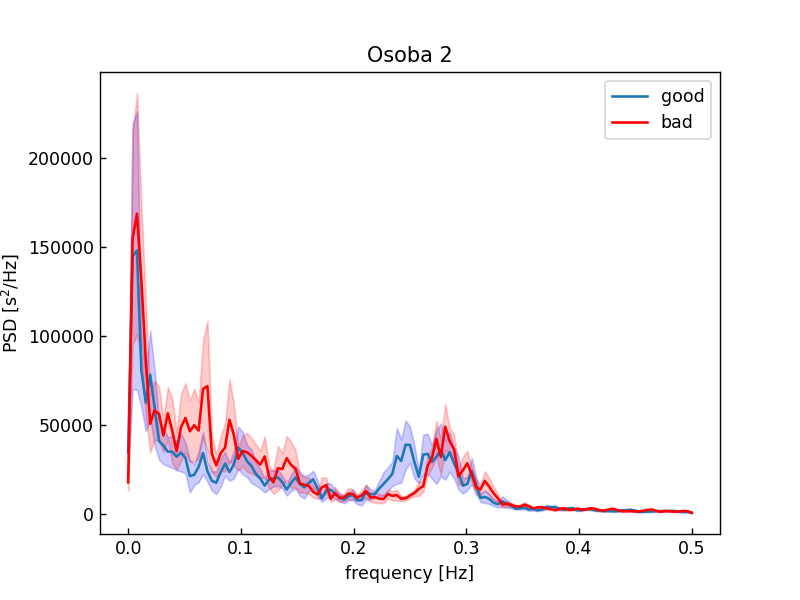

In [110]:
C_mean = np.mean(C,axis=0)
C_mean_err = np.std(C, axis=0)/np.sqrt(10)
#x = np.arange(len(e_good_asmr_mean))

D_mean = np.mean(D,axis=0)
D_mean_err = np.std(D, axis=0)/np.sqrt(10)
#x1 = np.arange(len(e_bad_asmr_mean))

plt.figure()
plt.plot(f, C_mean, label='good')
plt.fill_between(f, C_mean - C_mean_err, C_mean + C_mean_err, color='b', alpha=0.2)
plt.plot(f, D_mean, 'r', label='bad')
plt.fill_between(f, D_mean - D_mean_err, D_mean + D_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 2')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

Marysia

In [21]:
m1_good = np.fromfile('Justyna_Ossibach-Sikora/mgood1.txt', dtype = int, sep = ' ')
m2_good = np.fromfile('Justyna_Ossibach-Sikora/mgood2.txt', dtype = int, sep = ' ')
m3_good = np.fromfile('Justyna_Ossibach-Sikora/mgood3.txt', dtype = int, sep = ' ')
m4_good = np.fromfile('Justyna_Ossibach-Sikora/mgood4.txt', dtype = int, sep = ' ')
m5_good = np.fromfile('Justyna_Ossibach-Sikora/mgood5.txt', dtype = int, sep = ' ')
m1_bad = np.fromfile('Justyna_Ossibach-Sikora/mbad1.txt', dtype = int, sep = ' ')
m2_bad = np.fromfile('Justyna_Ossibach-Sikora/mbad2.txt', dtype = int, sep = ' ')
m3_bad = np.fromfile('Justyna_Ossibach-Sikora/mbad3.txt', dtype = int, sep = ' ')
m4_bad = np.fromfile('Justyna_Ossibach-Sikora/mbad4.txt', dtype = int, sep = ' ')
m5_bad = np.fromfile('Justyna_Ossibach-Sikora/mbad5.txt', dtype = int, sep = ' ')

In [22]:
m1_good_before, m1_good_asmr = analiza1(m1_good)
m2_good_before, m2_good_asmr = analiza1(m2_good)
m3_good_before, m3_good_asmr = analiza1(m3_good)
m4_good_before, m4_good_asmr = analiza1(m4_good)
m5_good_before, m5_good_asmr = analiza1(m5_good)

0 outlier(s) have been deleted.
424 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  5091.9558868701915
hf :  2222.7140944060566
lf_hf_ratio :  2.290873081556106
lfnu :  69.61292717107325
hfnu :  30.387072828926755
total_power :  10405.398719170083
vlf :  3090.7287378938345
ASMR
lf :  6518.504157786866
hf :  2655.9949176600685
lf_hf_ratio :  2.45426077980965
lfnu :  71.05024595001464
hfnu :  28.94975404998536
total_power :  16119.308939665414
vlf :  6944.80986421848
0 outlier(s) have been deleted.
447 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  6959.948840856511
hf :  2487.009928409114
lf_hf_ratio :  2.798520730196135
lfnu :  73.67396228614592
hfnu :  26.326037713854085
total_power :  12303.56602844871
vlf :  2856.607259183084
ASMR
lf :  6388.382678254975
hf :  3384.55103728038
lf_hf_ratio :  1.8875125852403432
lfnu :  65.3681163118891
hfnu :  34.63188368811091
total_power :  16668.496680852146
vlf :  6895.562965316791
0 outlier(s) have been deleted.


In [23]:
m1_bad_before, m1_bad_asmr = analiza1(m1_bad)
m2_bad_before, m2_bad_asmr = analiza1(m2_bad)
m3_bad_before, m3_bad_asmr = analiza1(m3_bad)
m4_bad_before, m4_bad_asmr = analiza1(m4_bad)
m5_bad_before, m5_bad_asmr = analiza1(m5_bad)

0 outlier(s) have been deleted.
430 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  4369.769252177215
hf :  2072.0802464084786
lf_hf_ratio :  2.1088803195490637
lfnu :  67.83407860020009
hfnu :  32.1659213997999
total_power :  8587.059570375533
vlf :  2145.2100717898397
ASMR
lf :  4183.685281360252
hf :  1894.315544596665
lf_hf_ratio :  2.2085471944174095
lfnu :  68.83324634464121
hfnu :  31.166753655358793
total_power :  10428.774232693377
vlf :  4350.773406736461
0 outlier(s) have been deleted.
459 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  9242.403369242187
hf :  2583.5041498205483
lf_hf_ratio :  3.5774679788628054
lfnu :  78.1538613788745
hfnu :  21.846138621125498
total_power :  15744.832902568965
vlf :  3918.9253835062304
ASMR
lf :  8209.144948836434
hf :  2864.44879341067
lf_hf_ratio :  2.865872473517632
lfnu :  74.13261800925159
hfnu :  25.867381990748413
total_power :  15476.594806237143
vlf :  4403.00106399004
0 outlier(s) have been delete

In [24]:
m= np.zeros((5,129))
m1= np.zeros((5,129))

plt.figure()
m[0,:] = widmo1(m1_good_asmr, [0,0,1])
m[1,:] = widmo1(m2_good_asmr, np.array([0,0,1])*0.8)
m[2,:]= widmo1(m3_good_asmr, np.array( [0,0,1])*0.6)
m[3,:] = widmo1(m4_good_asmr,  np.array([0,0,1])*0.4)
m[4,:] = widmo1(m5_good_asmr,  np.array([0,0,1])*0.2)

m1[0,:] = widmo1(m1_bad_asmr, 'r')
m1[1,:] = widmo1(m2_bad_asmr, 'r')
m1[2,:] = widmo1(m3_bad_asmr, 'r')
m1[3,:] = widmo1(m4_bad_asmr, 'r')
m1[4,:] = widmo1(m5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


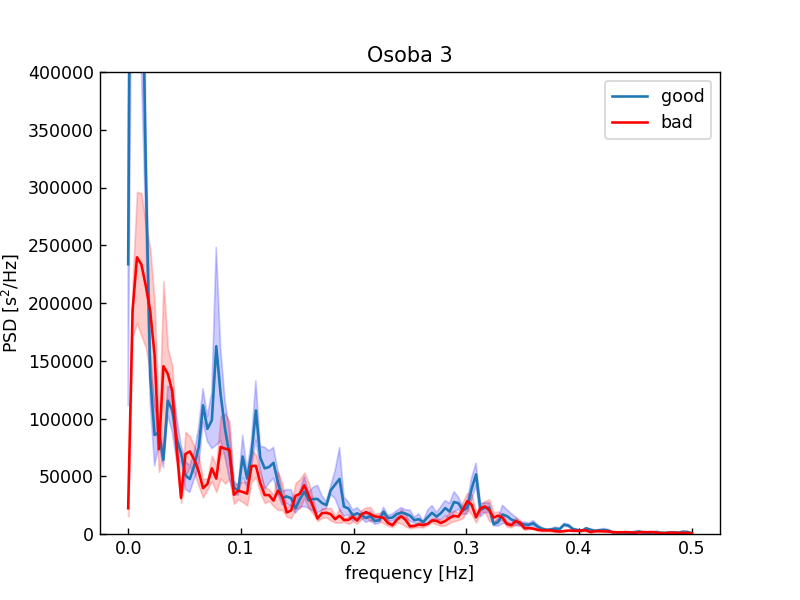

In [25]:
m_good_asmr_mean = np.mean(m,axis=0)
m_good_asmr_mean_err = np.std(m, axis=0)/np.sqrt(5)
#x = np.arange(len(m_good_asmr_mean))

m_bad_asmr_mean = np.mean(m1,axis=0)
m_bad_asmr_mean_err = np.std(m1, axis=0)/np.sqrt(5)
#x1 = np.arange(len(m_bad_asmr_mean))

plt.figure()
plt.plot(f, m_good_asmr_mean, label='good')
plt.fill_between(f, m_good_asmr_mean - m_good_asmr_mean_err, m_good_asmr_mean + m_good_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, m_bad_asmr_mean, 'r', label='bad')
plt.fill_between(f, m_bad_asmr_mean - m_bad_asmr_mean_err, m_bad_asmr_mean + m_bad_asmr_mean_err, color='r', alpha=0.2)
plt.ylim((0,400000))
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 3')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

<IPython.core.display.Javascript object>


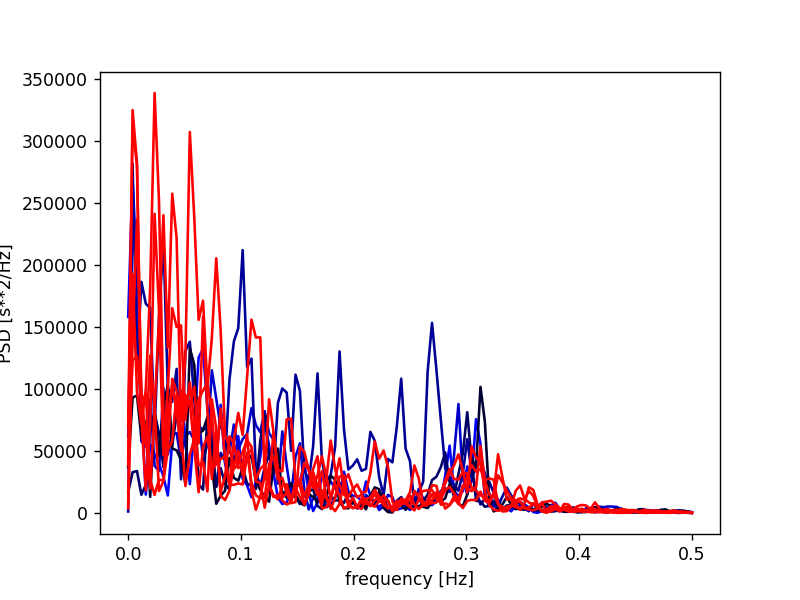

In [26]:
n= np.zeros((5,129))
n1= np.zeros((5,129))
plt.figure()
n[0,:] = widmo1(m1_good_before, [0,0,1])
n[1,:] = widmo1(m2_good_before, np.array([0,0,1])*0.8)
n[2,:]= widmo1(m3_good_before, np.array( [0,0,1])*0.6)
n[3,:] = widmo1(m4_good_before, np.array([0,0,1])*0.4)
n[4,:] = widmo1(m5_good_before, np.array([0,0,1])*0.2)
n1[0,:] = widmo1(m1_bad_before, 'r')
n1[1,:] = widmo1(m2_bad_before, 'r')
n1[2,:] = widmo1(m3_bad_before, 'r')
n1[3,:] = widmo1(m4_bad_before, 'r')
n1[4,:] = widmo1(m5_bad_before, 'r')
plt.show()

Przed i w trakcie uśrednione good

<IPython.core.display.Javascript object>


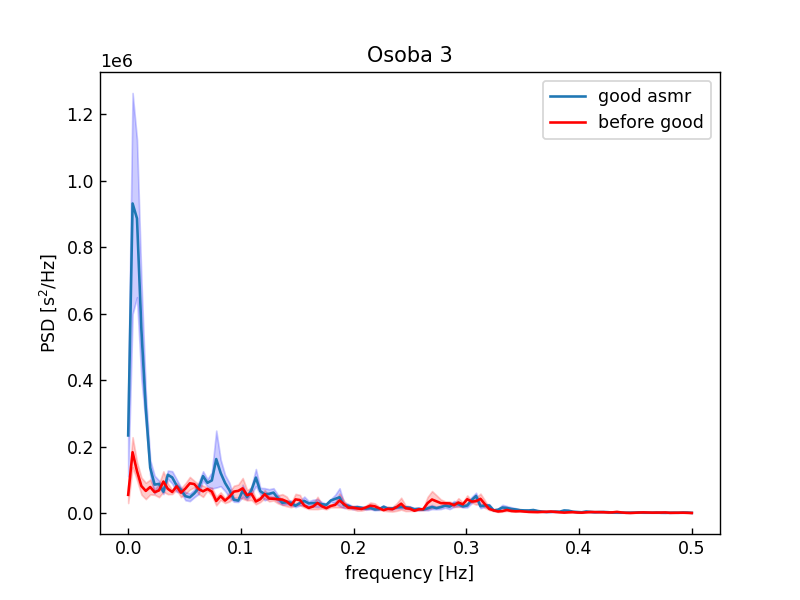

In [27]:
m_good_before_mean = np.mean(n,axis=0)
m_good_before_mean_err = np.std(n, axis=0)/np.sqrt(5)
#x = np.arange(len(s_good_asmr_mean))
plt.figure()
plt.plot(f, m_good_asmr_mean, label='good asmr')
plt.fill_between(f, m_good_asmr_mean - m_good_asmr_mean_err, m_good_asmr_mean + m_good_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, m_good_before_mean, 'r', label='before good')
plt.fill_between(f, m_good_before_mean - m_good_before_mean_err, m_good_before_mean + m_good_before_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 3')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

Przed i w trakcie uśrednione bad

<IPython.core.display.Javascript object>


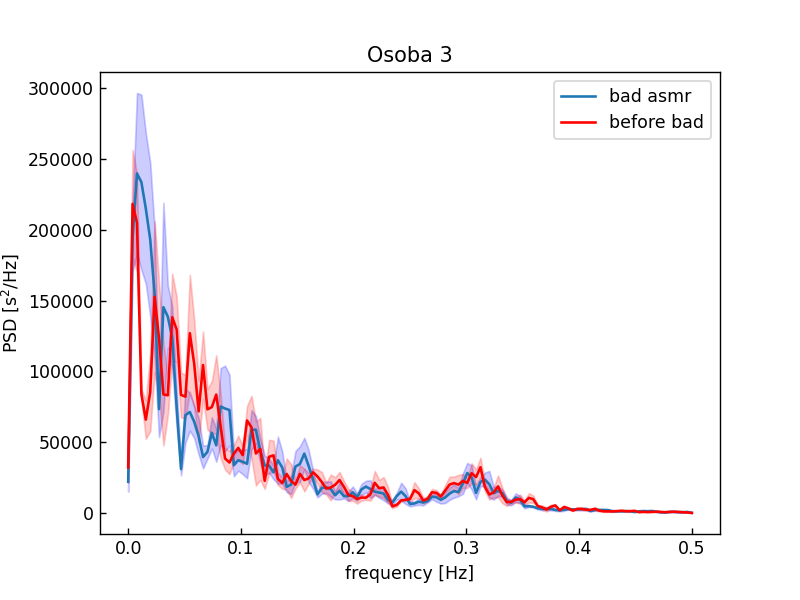

In [28]:
m_bad_before_mean = np.mean(n1,axis=0)
m_bad_before_mean_err = np.std(n1, axis=0)/np.sqrt(5)
#x1 = np.arange(len(s_bad_asmr_mean))
plt.figure()
plt.plot(f, m_bad_asmr_mean, label='bad asmr')
plt.fill_between(f, m_bad_asmr_mean - m_bad_asmr_mean_err, m_bad_asmr_mean + m_bad_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, m_bad_before_mean, 'r', label='before bad')
plt.fill_between(f, m_bad_before_mean - m_bad_before_mean_err, m_bad_before_mean + m_bad_before_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 3')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

PRZED vs W TRAKCIE (good i bad razem)

<IPython.core.display.Javascript object>


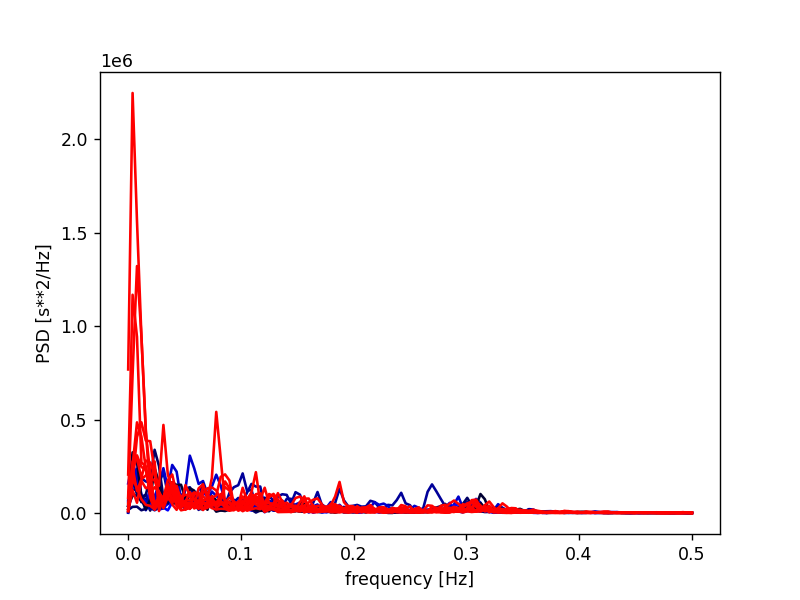

In [111]:
A= np.zeros((10,129))
B= np.zeros((10,129))

plt.figure()
A[0,:] = widmo1(m1_good_before, [0,0,1])
A[1,:] = widmo1(m2_good_before, np.array([0,0,1])*0.8)
A[2,:]= widmo1(m3_good_before, np.array( [0,0,1])*0.6)
A[3,:] = widmo1(m4_good_before,  np.array([0,0,1])*0.4)
A[4,:] = widmo1(m5_good_before,  np.array([0,0,1])*0.2)
A[5,:] = widmo1(m1_bad_before, [0,0,1])
A[6,:] = widmo1(m2_bad_before, np.array([0,0,1])*0.8)
A[7,:]= widmo1(m3_bad_before, np.array( [0,0,1])*0.6)
A[8,:] = widmo1(m4_bad_before,  np.array([0,0,1])*0.4)
A[9,:] = widmo1(m5_bad_before,  np.array([0,0,1])*0.2)

B[0,:] = widmo1(m1_good_asmr, 'r')
B[1,:] = widmo1(m2_good_asmr, 'r')
B[2,:] = widmo1(m3_good_asmr, 'r')
B[3,:] = widmo1(m4_good_asmr, 'r')
B[4,:] = widmo1(m5_good_asmr, 'r')
B[5,:] = widmo1(m1_bad_asmr, 'r')
B[6,:] = widmo1(m2_bad_asmr, 'r')
B[7,:] = widmo1(m3_bad_asmr, 'r')
B[8,:] = widmo1(m4_bad_asmr, 'r')
B[9,:] = widmo1(m5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>


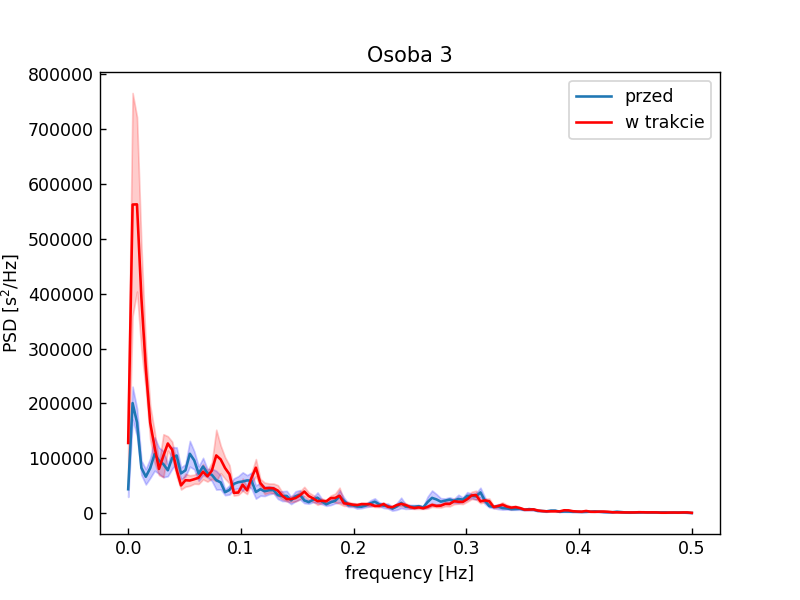

In [112]:
A_mean = np.mean(A,axis=0)
A_mean_err = np.std(A, axis=0)/np.sqrt(10)
#x = np.arange(len(e_good_asmr_mean))

B_mean = np.mean(B,axis=0)
B_mean_err = np.std(B, axis=0)/np.sqrt(10)
#x1 = np.arange(len(e_bad_asmr_mean))

plt.figure()
plt.plot(f, A_mean, label='przed')
plt.fill_between(f, A_mean - A_mean_err, A_mean + A_mean_err, color='b', alpha=0.2)
plt.plot(f, B_mean, 'r', label='w trakcie')
plt.fill_between(f, B_mean - B_mean_err, B_mean + B_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 3')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

GOOD vs BAD (przed i w trakcie razem)

<IPython.core.display.Javascript object>


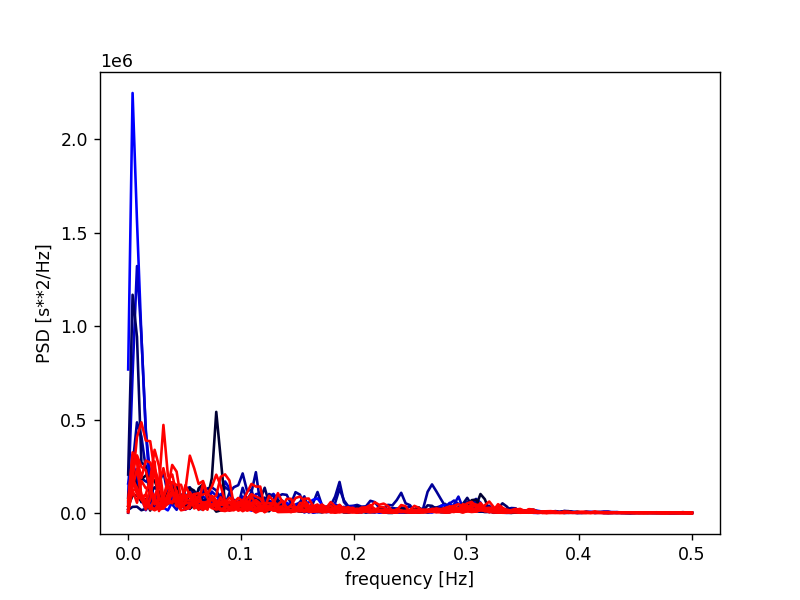

In [113]:
C= np.zeros((10,129))
D= np.zeros((10,129))

plt.figure()
C[0,:] = widmo1(m1_good_before, [0,0,1])
C[1,:] = widmo1(m2_good_before, np.array([0,0,1])*0.8)
C[2,:]= widmo1(m3_good_before, np.array( [0,0,1])*0.6)
C[3,:] = widmo1(m4_good_before,  np.array([0,0,1])*0.4)
C[4,:] = widmo1(m5_good_before,  np.array([0,0,1])*0.2)
C[5,:] = widmo1(m1_good_asmr, [0,0,1])
C[6,:] = widmo1(m2_good_asmr, np.array([0,0,1])*0.8)
C[7,:]= widmo1(m3_good_asmr, np.array( [0,0,1])*0.6)
C[8,:] = widmo1(m4_good_asmr,  np.array([0,0,1])*0.4)
C[9,:] = widmo1(m5_good_asmr,  np.array([0,0,1])*0.2)

D[0,:] = widmo1(m1_bad_before, 'r')
D[1,:] = widmo1(m2_bad_before, 'r')
D[2,:] = widmo1(m3_bad_before, 'r')
D[3,:] = widmo1(m4_bad_before, 'r')
D[4,:] = widmo1(m5_bad_before, 'r')
D[5,:] = widmo1(m1_bad_asmr, 'r')
D[6,:] = widmo1(m2_bad_asmr, 'r')
D[7,:] = widmo1(m3_bad_asmr, 'r')
D[8,:] = widmo1(m4_bad_asmr, 'r')
D[9,:] = widmo1(m5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>


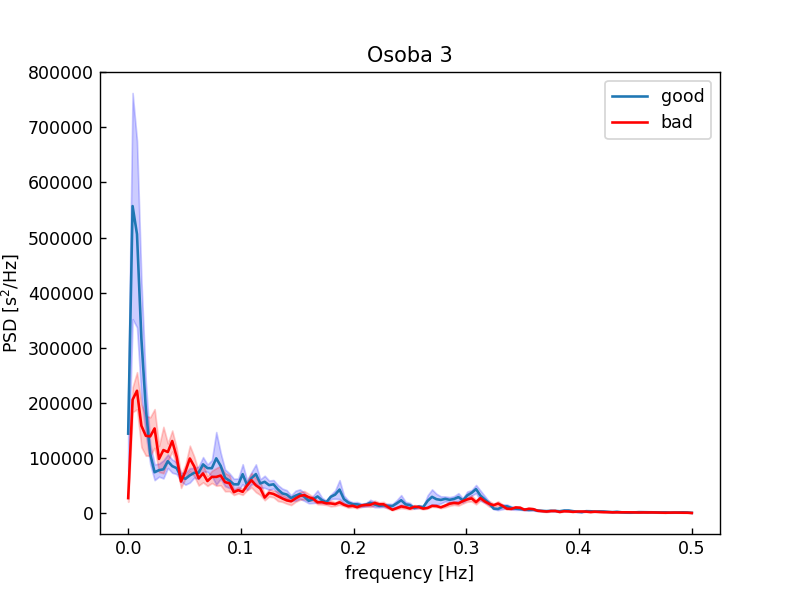

In [114]:
C_mean = np.mean(C,axis=0)
C_mean_err = np.std(C, axis=0)/np.sqrt(10)
#x = np.arange(len(e_good_asmr_mean))

D_mean = np.mean(D,axis=0)
D_mean_err = np.std(D, axis=0)/np.sqrt(10)
#x1 = np.arange(len(e_bad_asmr_mean))

plt.figure()
plt.plot(f, C_mean, label='good')
plt.fill_between(f, C_mean - C_mean_err, C_mean + C_mean_err, color='b', alpha=0.2)
plt.plot(f, D_mean, 'r', label='bad')
plt.fill_between(f, D_mean - D_mean_err, D_mean + D_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 3')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

Karolina

In [29]:
k1_good = np.fromfile('Justyna_Ossibach-Sikora/kgood1.txt', dtype = int, sep = ' ')
k2_good = np.fromfile('Justyna_Ossibach-Sikora/kgood2.txt', dtype = int, sep = ' ')
k3_good = np.fromfile('Justyna_Ossibach-Sikora/kgood3.txt', dtype = int, sep = ' ')
k4_good = np.fromfile('Justyna_Ossibach-Sikora/kgood4.txt', dtype = int, sep = ' ')
k5_good = np.fromfile('Justyna_Ossibach-Sikora/kgood5.txt', dtype = int, sep = ' ')
k1_bad = np.fromfile('Justyna_Ossibach-Sikora/kbad1.txt', dtype = int, sep = ' ')
k2_bad = np.fromfile('Justyna_Ossibach-Sikora/kbad2.txt', dtype = int, sep = ' ')
k3_bad = np.fromfile('Justyna_Ossibach-Sikora/kbad3.txt', dtype = int, sep = ' ')
k4_bad = np.fromfile('Justyna_Ossibach-Sikora/kbad4.txt', dtype = int, sep = ' ')
k5_bad = np.fromfile('Justyna_Ossibach-Sikora/kbad5.txt', dtype = int, sep = ' ')

In [30]:
k1_good_before, k1_good_asmr = analiza1(k1_good)
k2_good_before, k2_good_asmr = analiza1(k2_good)
k3_good_before, k3_good_asmr = analiza1(k3_good)
k4_good_before, k4_good_asmr = analiza1(k4_good)
k5_good_before, k5_good_asmr = analiza1(k5_good)

0 outlier(s) have been deleted.
2 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  979.2731600078724
hf :  571.4840397314701
lf_hf_ratio :  1.713561695385255
lfnu :  63.14806471138568
hfnu :  36.85193528861433
total_power :  2538.019047422765
vlf :  987.2618476834225
ASMR
lf :  561.2592411121896
hf :  623.5624927853067
lf_hf_ratio :  0.9000849916504386
lfnu :  47.370775286668255
hfnu :  52.62922471333174
total_power :  1984.6535402792833
vlf :  799.831806381787
0 outlier(s) have been deleted.
2 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  691.7060243161384
hf :  334.59127189235573
lf_hf_ratio :  2.0673164019014614
lfnu :  67.3982116947541
hfnu :  32.601788305245904
total_power :  1842.081445714381
vlf :  815.784149505887
ASMR
lf :  693.9741958214072
hf :  448.7204520871804
lf_hf_ratio :  1.5465624367987962
lfnu :  60.73137710862222
hfnu :  39.26862289137779
total_power :  1624.5529043195284
vlf :  481.8582564109408
0 outlier(s) have been deleted.
30 ec

In [31]:
k1_bad_before, k1_bad_asmr = analiza1(k1_bad)
k2_bad_before, k2_bad_asmr = analiza1(k2_bad)
k3_bad_before, k3_bad_asmr = analiza1(k3_bad)
k4_bad_before, k4_bad_asmr = analiza1(k4_bad)
k5_bad_before, k5_bad_asmr = analiza1(k5_bad)

0 outlier(s) have been deleted.
2 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  623.0361421485185
hf :  1307.5644259138558
lf_hf_ratio :  0.4764859993136315
lfnu :  32.271623268702434
hfnu :  67.72837673129757
total_power :  2379.8477813179124
vlf :  449.2472132555381
ASMR
lf :  807.9883777262804
hf :  492.1745547856202
lf_hf_ratio :  1.6416703583512589
lfnu :  62.14516331159016
hfnu :  37.85483668840984
total_power :  1887.7839636816989
vlf :  587.621031169798
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  512.2013983284082
hf :  787.1156906138634
lf_hf_ratio :  0.6507320390588932
lfnu :  39.420815956894195
hfnu :  60.57918404310579
total_power :  1511.6906925544872
vlf :  212.3736036122155
ASMR
lf :  513.6945610978818
hf :  276.30329176727344
lf_hf_ratio :  1.8591691680986553
lfnu :  65.02480471748375
hfnu :  34.97519528251625
total_power :  1115.781742787306
vlf :  325.783889922151
0 outlier(s) have been deleted.
6

<IPython.core.display.Javascript object>


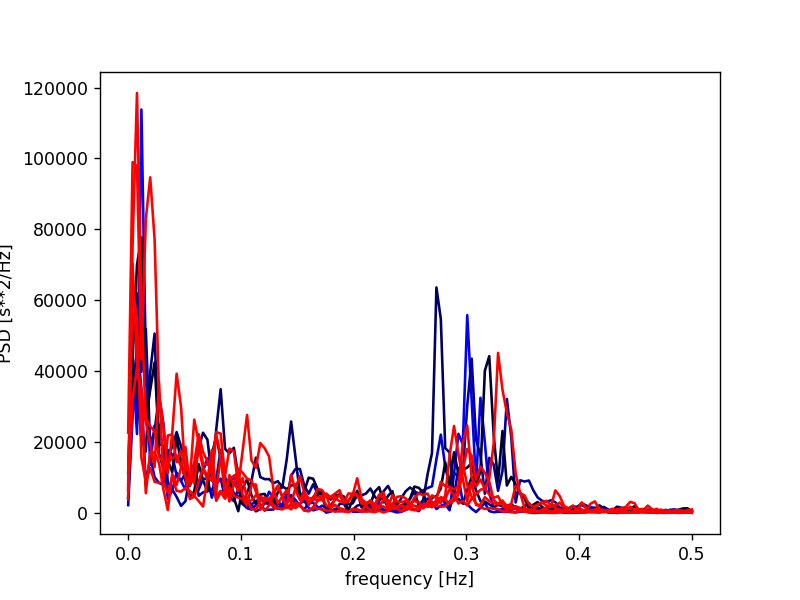

In [32]:
k= np.zeros((5,129))
k1= np.zeros((5,129))

plt.figure()
k[0,:] = widmo1(k1_good_asmr, [0,0,1])
k[1,:] = widmo1(k2_good_asmr, np.array([0,0,1])*0.8)
k[2,:]= widmo1(k3_good_asmr, np.array( [0,0,1])*0.6)
k[3,:] = widmo1(k4_good_asmr,  np.array([0,0,1])*0.4)
k[4,:] = widmo1(k5_good_asmr,  np.array([0,0,1])*0.2)

k1[0,:] = widmo1(k1_bad_asmr, 'r')
k1[1,:] = widmo1(k2_bad_asmr, 'r')
k1[2,:] = widmo1(k3_bad_asmr, 'r')
k1[3,:] = widmo1(k4_bad_asmr, 'r')
k1[4,:] = widmo1(k5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>


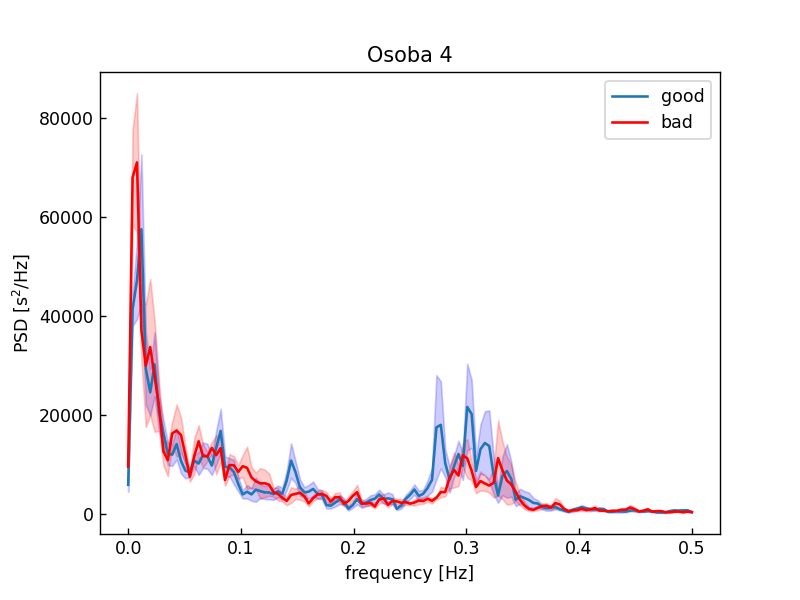

In [33]:
k_good_asmr_mean = np.mean(k,axis=0)
k_good_asmr_mean_err = np.std(k, axis=0)/np.sqrt(5)
#x = np.arange(len(k_good_asmr_mean))

k_bad_asmr_mean = np.mean(k1,axis=0)
k_bad_asmr_mean_err = np.std(k1, axis=0)/np.sqrt(5)
#x1 = np.arange(len(k_bad_asmr_mean))

plt.figure()
plt.plot(f, k_good_asmr_mean, label='good')
plt.fill_between(f, k_good_asmr_mean - k_good_asmr_mean_err, k_good_asmr_mean + k_good_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, k_bad_asmr_mean, 'r', label='bad')
plt.fill_between(f, k_bad_asmr_mean - k_bad_asmr_mean_err, k_bad_asmr_mean + k_bad_asmr_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 4')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

<IPython.core.display.Javascript object>


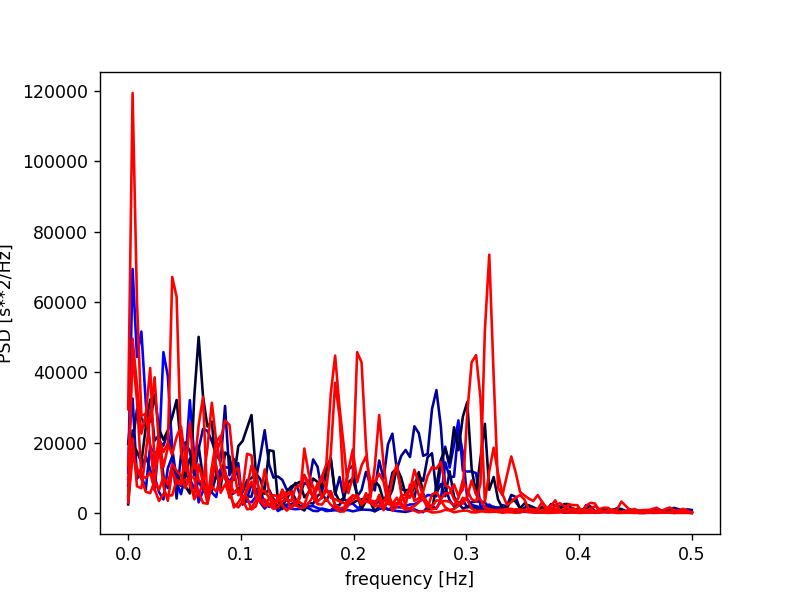

In [34]:
l= np.zeros((5,129))
l1= np.zeros((5,129))
plt.figure()
l[0,:] = widmo1(k1_good_before, [0,0,1])
l[1,:] = widmo1(k2_good_before, np.array([0,0,1])*0.8)
l[2,:]= widmo1(k3_good_before, np.array( [0,0,1])*0.6)
l[3,:] = widmo1(k4_good_before, np.array([0,0,1])*0.4)
l[4,:] = widmo1(k5_good_before, np.array([0,0,1])*0.2)
l1[0,:] = widmo1(k1_bad_before, 'r')
l1[1,:] = widmo1(k2_bad_before, 'r')
l1[2,:] = widmo1(k3_bad_before, 'r')
l1[3,:] = widmo1(k4_bad_before, 'r')
l1[4,:] = widmo1(k5_bad_before, 'r')
plt.show()

Przed i w trakcie uśrednione good

<IPython.core.display.Javascript object>


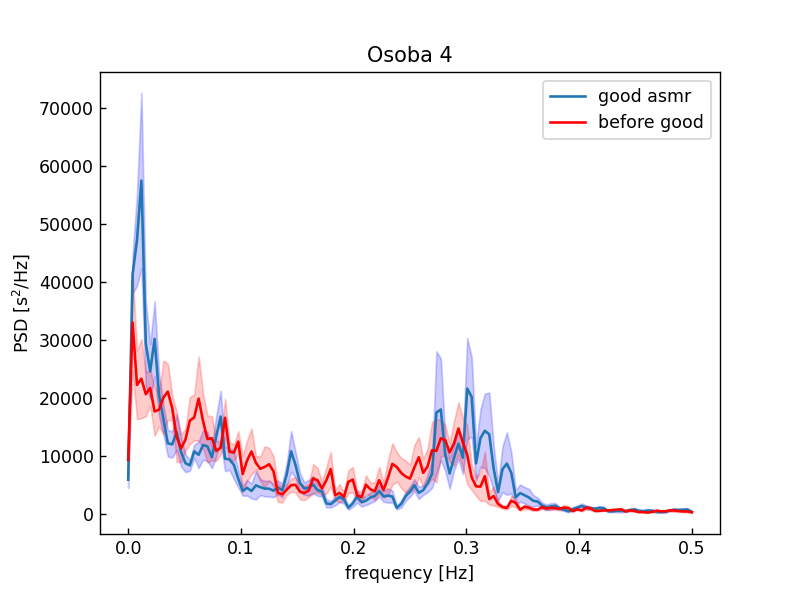

In [35]:
k_good_before_mean = np.mean(l,axis=0)
k_good_before_mean_err = np.std(l, axis=0)/np.sqrt(5)
#x = np.arange(len(s_good_asmr_mean))
plt.figure()
plt.plot(f, k_good_asmr_mean, label='good asmr')
plt.fill_between(f, k_good_asmr_mean - k_good_asmr_mean_err, k_good_asmr_mean + k_good_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, k_good_before_mean, 'r', label='before good')
plt.fill_between(f, k_good_before_mean - k_good_before_mean_err, k_good_before_mean + k_good_before_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 4')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

Przed i w trakcie uśrednione bad

<IPython.core.display.Javascript object>


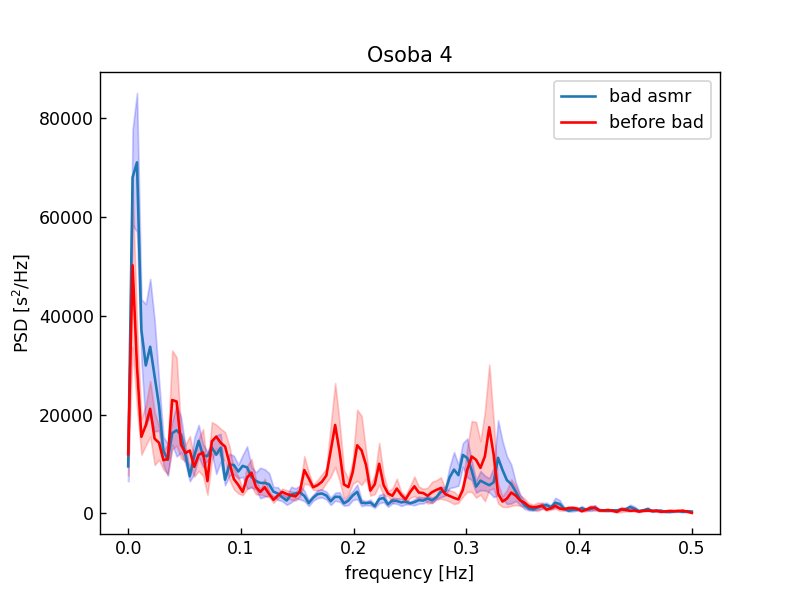

In [36]:
k_bad_before_mean = np.mean(l1,axis=0)
k_bad_before_mean_err = np.std(l1, axis=0)/np.sqrt(5)
#x1 = np.arange(len(s_bad_asmr_mean))
plt.figure()
plt.plot(f, k_bad_asmr_mean, label='bad asmr')
plt.fill_between(f, k_bad_asmr_mean - k_bad_asmr_mean_err, k_bad_asmr_mean + k_bad_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, k_bad_before_mean, 'r', label='before bad')
plt.fill_between(f, k_bad_before_mean - k_bad_before_mean_err, k_bad_before_mean + k_bad_before_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 4')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

PRZED vs W TRAKCIE (good i bad razem)

<IPython.core.display.Javascript object>


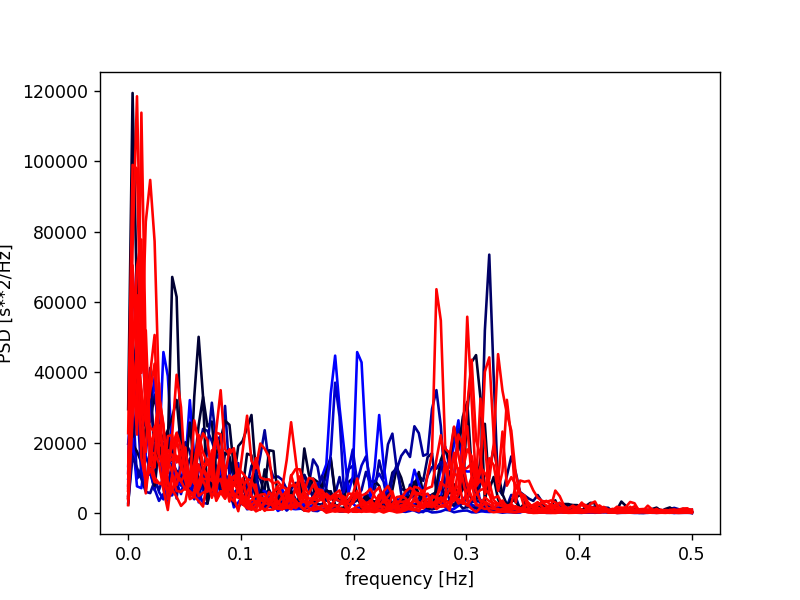

In [115]:
A= np.zeros((10,129))
B= np.zeros((10,129))

plt.figure()
A[0,:] = widmo1(k1_good_before, [0,0,1])
A[1,:] = widmo1(k2_good_before, np.array([0,0,1])*0.8)
A[2,:]= widmo1(k3_good_before, np.array( [0,0,1])*0.6)
A[3,:] = widmo1(k4_good_before,  np.array([0,0,1])*0.4)
A[4,:] = widmo1(k5_good_before,  np.array([0,0,1])*0.2)
A[5,:] = widmo1(k1_bad_before, [0,0,1])
A[6,:] = widmo1(k2_bad_before, np.array([0,0,1])*0.8)
A[7,:]= widmo1(k3_bad_before, np.array( [0,0,1])*0.6)
A[8,:] = widmo1(k4_bad_before,  np.array([0,0,1])*0.4)
A[9,:] = widmo1(k5_bad_before,  np.array([0,0,1])*0.2)

B[0,:] = widmo1(k1_good_asmr, 'r')
B[1,:] = widmo1(k2_good_asmr, 'r')
B[2,:] = widmo1(k3_good_asmr, 'r')
B[3,:] = widmo1(k4_good_asmr, 'r')
B[4,:] = widmo1(k5_good_asmr, 'r')
B[5,:] = widmo1(k1_bad_asmr, 'r')
B[6,:] = widmo1(k2_bad_asmr, 'r')
B[7,:] = widmo1(k3_bad_asmr, 'r')
B[8,:] = widmo1(k4_bad_asmr, 'r')
B[9,:] = widmo1(k5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>


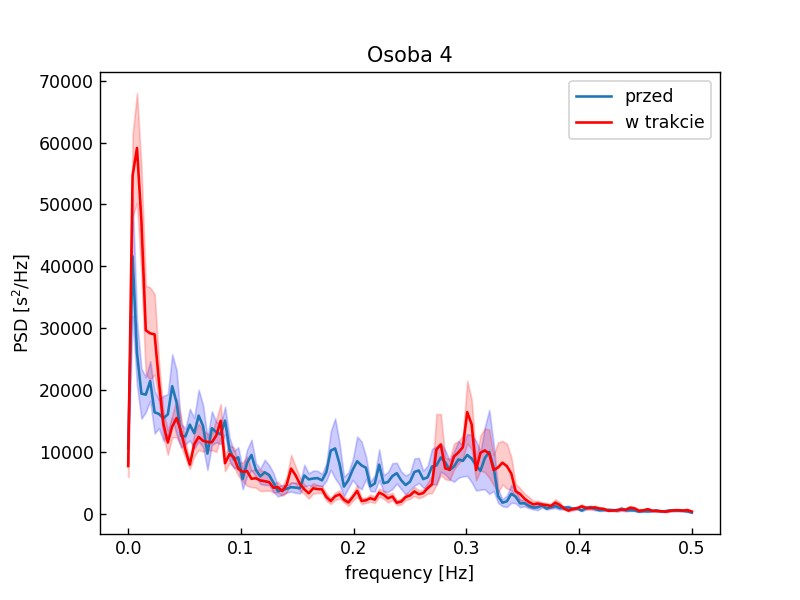

In [116]:
A_mean = np.mean(A,axis=0)
A_mean_err = np.std(A, axis=0)/np.sqrt(10)
#x = np.arange(len(e_good_asmr_mean))

B_mean = np.mean(B,axis=0)
B_mean_err = np.std(B, axis=0)/np.sqrt(10)
#x1 = np.arange(len(e_bad_asmr_mean))

plt.figure()
plt.plot(f, A_mean, label='przed')
plt.fill_between(f, A_mean - A_mean_err, A_mean + A_mean_err, color='b', alpha=0.2)
plt.plot(f, B_mean, 'r', label='w trakcie')
plt.fill_between(f, B_mean - B_mean_err, B_mean + B_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 4')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

GOOD vs BAD (przed i w trakcie razem)

<IPython.core.display.Javascript object>


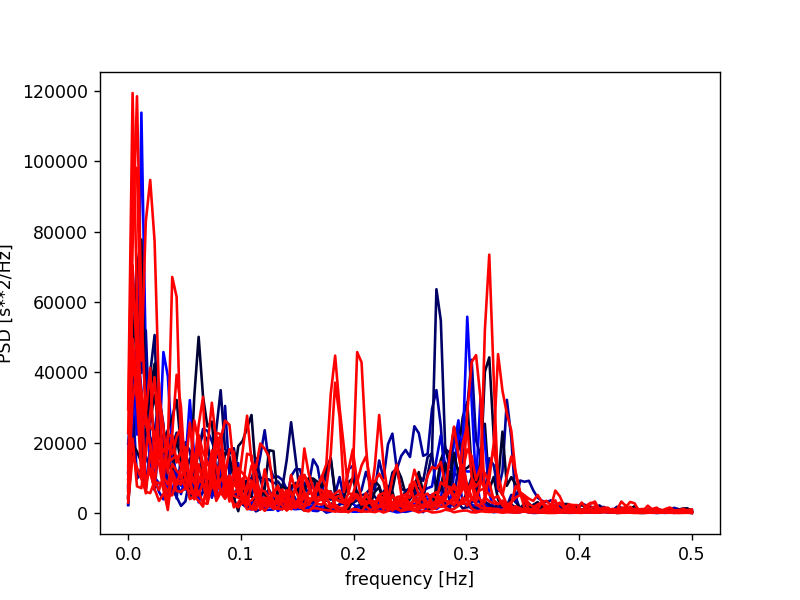

In [117]:
C= np.zeros((10,129))
D= np.zeros((10,129))

plt.figure()
C[0,:] = widmo1(k1_good_before, [0,0,1])
C[1,:] = widmo1(k2_good_before, np.array([0,0,1])*0.8)
C[2,:]= widmo1(k3_good_before, np.array( [0,0,1])*0.6)
C[3,:] = widmo1(k4_good_before,  np.array([0,0,1])*0.4)
C[4,:] = widmo1(k5_good_before,  np.array([0,0,1])*0.2)
C[5,:] = widmo1(k1_good_asmr, [0,0,1])
C[6,:] = widmo1(k2_good_asmr, np.array([0,0,1])*0.8)
C[7,:]= widmo1(k3_good_asmr, np.array( [0,0,1])*0.6)
C[8,:] = widmo1(k4_good_asmr,  np.array([0,0,1])*0.4)
C[9,:] = widmo1(k5_good_asmr,  np.array([0,0,1])*0.2)

D[0,:] = widmo1(k1_bad_before, 'r')
D[1,:] = widmo1(k2_bad_before, 'r')
D[2,:] = widmo1(k3_bad_before, 'r')
D[3,:] = widmo1(k4_bad_before, 'r')
D[4,:] = widmo1(k5_bad_before, 'r')
D[5,:] = widmo1(k1_bad_asmr, 'r')
D[6,:] = widmo1(k2_bad_asmr, 'r')
D[7,:] = widmo1(k3_bad_asmr, 'r')
D[8,:] = widmo1(k4_bad_asmr, 'r')
D[9,:] = widmo1(k5_bad_asmr, 'r')
plt.show()

<IPython.core.display.Javascript object>


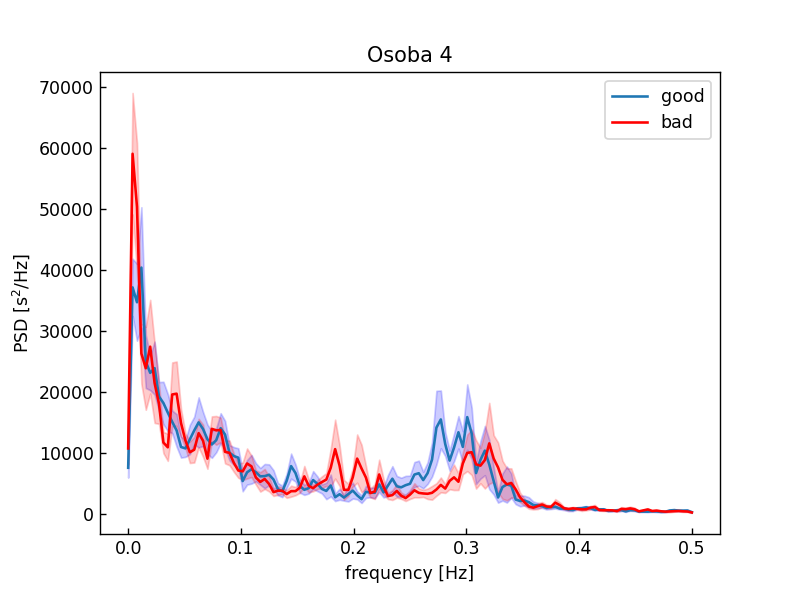

In [118]:
C_mean = np.mean(C,axis=0)
C_mean_err = np.std(C, axis=0)/np.sqrt(10)
#x = np.arange(len(e_good_asmr_mean))

D_mean = np.mean(D,axis=0)
D_mean_err = np.std(D, axis=0)/np.sqrt(10)
#x1 = np.arange(len(e_bad_asmr_mean))

plt.figure()
plt.plot(f, C_mean, label='good')
plt.fill_between(f, C_mean - C_mean_err, C_mean + C_mean_err, color='b', alpha=0.2)
plt.plot(f, D_mean, 'r', label='bad')
plt.fill_between(f, D_mean - D_mean_err, D_mean + D_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 4')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

Paweł

In [37]:
p1_bad = np.fromfile('Justyna_Ossibach-Sikora/pbad1.txt', dtype = int, sep = ' ')
p2_bad = np.fromfile('Justyna_Ossibach-Sikora/pbad2.txt', dtype = int, sep = ' ')
p3_bad = np.fromfile('Justyna_Ossibach-Sikora/pbad3.txt', dtype = int, sep = ' ')
p4_bad = np.fromfile('Justyna_Ossibach-Sikora/pbad4.txt', dtype = int, sep = ' ')
p5_bad = np.fromfile('Justyna_Ossibach-Sikora/pbad5.txt', dtype = int, sep = ' ')

In [38]:
p1_bad_before, p1_bad_asmr = analiza1(p1_bad)
p2_bad_before, p2_bad_asmr = analiza1(p2_bad)
p3_bad_before, p3_bad_asmr = analiza1(p3_bad)
p4_bad_before, p4_bad_asmr = analiza1(p4_bad)
p5_bad_before, p5_bad_asmr = analiza1(p5_bad)

0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  137.5785410108196
hf :  50.90517326034555
lf_hf_ratio :  2.7026436057333187
lfnu :  72.99226967317188
hfnu :  27.007730326828128
total_power :  309.13471368690045
vlf :  120.65099941573528
ASMR
lf :  84.68354817899457
hf :  29.4742739421371
lf_hf_ratio :  2.8731343253863506
lfnu :  74.18111751390785
hfnu :  25.818882486092154
total_power :  224.3837714561027
vlf :  110.22594933497102
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
BEFORE
lf :  41.507938312666724
hf :  28.687607117864673
lf_hf_ratio :  1.4468944078231756
lfnu :  59.131869491269654
hfnu :  40.868130508730346
total_power :  162.28739501002158
vlf :  92.09184957949019
ASMR
lf :  43.88769121926479
hf :  20.661203565852887
lf_hf_ratio :  2.1241594701578133
lfnu :  67.99139065876535
hfnu :  32.008609341234624
total_power :  120.71712661178866
vlf :  56.16823182667099
0 outlier(s) have been del

/tmp/ipykernel_41134/466182437.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


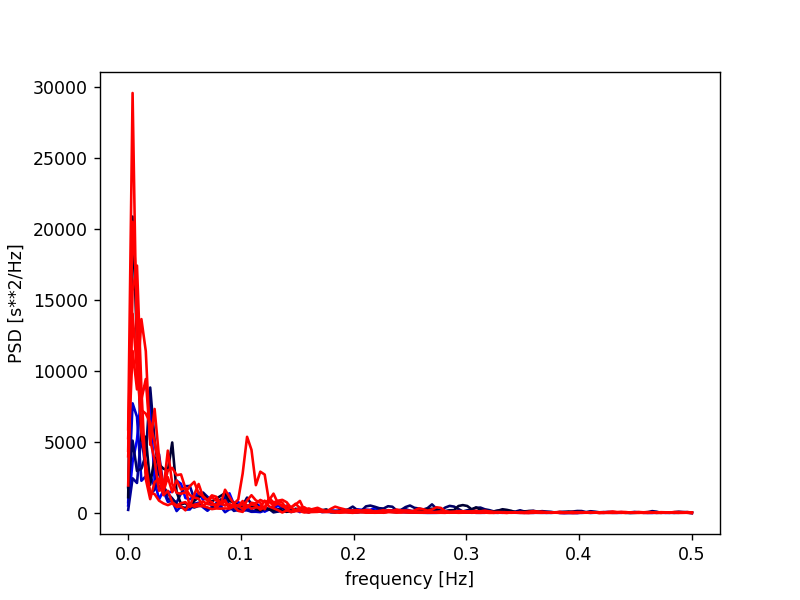

In [39]:
p= np.zeros((5,129))
p1= np.zeros((5,129))

plt.figure()
p[0,:] = widmo1(p1_bad_asmr, [0,0,1])
p[1,:] = widmo1(p2_bad_asmr, np.array([0,0,1])*0.8)
p[2,:]= widmo1(p3_bad_asmr, np.array( [0,0,1])*0.6)
p[3,:] = widmo1(p4_bad_asmr,  np.array([0,0,1])*0.4)
p[4,:] = widmo1(p5_bad_asmr,  np.array([0,0,1])*0.2)
p1[0,:] = widmo1(p1_bad_before, 'r')
p1[1,:] = widmo1(p2_bad_before, 'r')
p1[2,:] = widmo1(p3_bad_before, 'r')
p1[3,:] = widmo1(p4_bad_before, 'r')
p1[4,:] = widmo1(p5_bad_before, 'r')

plt.show()

Przed i w trakcie uśrednione - tylko bad, bo nie działa

<IPython.core.display.Javascript object>


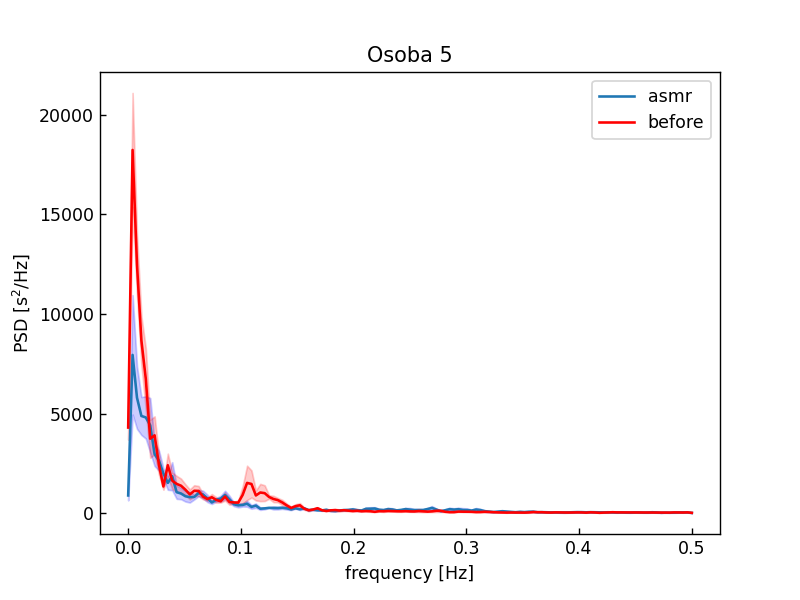

In [40]:
p_bad_asmr_mean = np.mean(p,axis=0)
p_bad_asmr_mean_err = np.std(p, axis=0)/np.sqrt(5)
p_bad_before_mean = np.mean(p1,axis=0)
p_bad_before_mean_err = np.std(p1, axis=0)/np.sqrt(5)
#x1 = np.arange(len(s_bad_asmr_mean))
plt.figure()
plt.plot(f, p_bad_asmr_mean, label='asmr')
plt.fill_between(f, p_bad_asmr_mean - p_bad_asmr_mean_err, p_bad_asmr_mean + p_bad_asmr_mean_err, color='b', alpha=0.2)
plt.plot(f, p_bad_before_mean, 'r', label='before')
plt.fill_between(f, p_bad_before_mean - p_bad_before_mean_err, p_bad_before_mean + p_bad_before_mean_err, color='r', alpha=0.2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [s$^2$/Hz]')
plt.legend()
plt.title('Osoba 5')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.show()

TESTY STATYSTYCZNE - ANOVA DWUCZYNNIKOWA

In [52]:
import pandas as pd
import pingouin as pg

osoba: 0-ja, 1-emila, 2-marysia, 3-karolina, 4-pawel

typ: 0-bad, 1-good

moment: 0-before, 1-asmr

In [53]:
data = pd.read_csv("mgr_data.csv")
print(data.loc[0:19])
print(data.loc[20:39])
print(data.loc[40:59])
print(data.loc[60:79])
print(data.loc[80:])


    osoba_pomiar  typ  moment       LF       HF     LF/HF
0              0    0       0   769.58   863.59  0.891140
1              0    0       1   771.15   490.64  1.571723
2              0    1       0   552.27   881.41  0.626576
3              0    1       1   803.95   939.71  0.855530
4              0    0       0   664.38   998.30  0.665511
5              0    0       1   409.63   278.73  1.469630
6              0    1       0   703.42   555.99  1.265167
7              0    1       1  1207.00   612.64  1.970162
8              0    0       0   550.27   771.09  0.713626
9              0    0       1   535.06   473.72  1.129486
10             0    1       0  1251.92  1261.21  0.992634
11             0    1       1  1241.46  1138.24  1.090684
12             0    0       0   800.09   938.32  0.852684
13             0    0       1   752.93   631.27  1.192723
14             0    1       0   663.77   771.43  0.860441
15             0    1       1  1011.03   690.74  1.463691
16            

In [54]:
df_new = data.groupby(['osoba_pomiar', 'typ', 'moment']).mean()
print(df_new)

                               LF        HF     LF/HF
osoba_pomiar typ moment                              
0            0   0        634.872   846.524  0.742550
                 1        598.418   448.662  1.356393
             1   0        799.442   912.632  0.900059
                 1       1230.462   869.990  1.466026
1            0   0       3743.744  2354.570  1.338074
                 1       4279.924  2104.228  1.914093
             1   0       1626.916  1814.714  0.867368
                 1       3933.746  3224.568  1.325435
2            0   0       6216.812  2320.192  2.629611
                 1       5703.934  2195.304  2.543334
             1   0       5953.922  2864.392  2.232168
                 1       7345.034  2835.662  2.629563
3            0   0        887.892   916.836  1.016446
                 1        961.810   614.174  1.624940
             1   0       1161.136   801.054  1.573063
                 1        877.386   789.736  1.131474
4            2   0         9

In [55]:
df_new= df_new.reset_index()
df_new = df_new.loc[0:15]
print(df_new)

    osoba_pomiar  typ  moment        LF        HF     LF/HF
0              0    0       0   634.872   846.524  0.742550
1              0    0       1   598.418   448.662  1.356393
2              0    1       0   799.442   912.632  0.900059
3              0    1       1  1230.462   869.990  1.466026
4              1    0       0  3743.744  2354.570  1.338074
5              1    0       1  4279.924  2104.228  1.914093
6              1    1       0  1626.916  1814.714  0.867368
7              1    1       1  3933.746  3224.568  1.325435
8              2    0       0  6216.812  2320.192  2.629611
9              2    0       1  5703.934  2195.304  2.543334
10             2    1       0  5953.922  2864.392  2.232168
11             2    1       1  7345.034  2835.662  2.629563
12             3    0       0   887.892   916.836  1.016446
13             3    0       1   961.810   614.174  1.624940
14             3    1       0  1161.136   801.054  1.573063
15             3    1       1   877.386 

badanie czy z rozkładu normalnego

In [56]:
print('JA')
print(pg.normality(data.loc[0:19, 'LF']))                                    # Univariate normality
print(pg.normality(data.loc[0:19, 'HF']))
print(pg.normality(data.loc[0:19, 'LF/HF']))

print('\nEMILA')
print(pg.normality(data.loc[20:39, 'LF']))                                    # Univariate normality
print(pg.normality(data.loc[20:39, 'HF']))
print(pg.normality(data.loc[20:39, 'LF/HF']))

print('\nMARYSIA')
print(pg.normality(data.loc[40:59, 'LF']))                                    # Univariate normality
print(pg.normality(data.loc[40:59, 'HF']))
print(pg.normality(data.loc[40:59, 'LF/HF']))

print('\nKAROLINA')
print(pg.normality(data.loc[60:79, 'LF']))                                    # Univariate normality
print(pg.normality(data.loc[60:79, 'HF']))
print(pg.normality(data.loc[60:79, 'LF/HF']))

print('\nPAWEŁ')
print(pg.normality(data.loc[80:, 'LF']))                                    # Univariate normality
print(pg.normality(data.loc[80:, 'HF']))
print(pg.normality(data.loc[80:, 'LF/HF']))

#print(pg.normality(data["HF"]))
#print(pg.normality(data["LF/HF"]))

#print(pg.multivariate_normality(np.column_stack((x, y)))) # Multivariate normality

JA
           W      pval  normal
LF  0.858998  0.007571   False
           W      pval  normal
HF  0.986412  0.988876    True
             W      pval  normal
LF/HF  0.92352  0.115831    True

EMILA
           W      pval  normal
LF  0.825211  0.002106   False
           W      pval  normal
HF  0.885717  0.022453   False
              W      pval  normal
LF/HF  0.797817  0.000802   False

MARYSIA
           W      pval  normal
LF  0.906065  0.053655    True
           W      pval  normal
HF  0.710576  0.000053   False
              W      pval  normal
LF/HF  0.974119  0.838313    True

KAROLINA
           W      pval  normal
LF  0.922395  0.110186    True
           W      pval  normal
HF  0.974761  0.850411    True
              W      pval  normal
LF/HF  0.986366  0.988675    True

PAWEŁ
           W      pval  normal
LF  0.966129  0.852824    True
           W      pval  normal
HF  0.922854  0.381374    True
              W      pval  normal
LF/HF  0.979577  0.962867    True


Two-way repeated-measures ANOVA

In [57]:
df = pg.read_dataset('rm_anova')
aov = pg.rm_anova(dv='LF/HF', within=['typ', 'moment'],
                  subject='osoba_pomiar', data=df_new.loc[0:15], detailed=True, effsize="np2")


pg.print_table(df=aov, floatfmt='.3f', tablefmt='latex_booktabs')


ANOVA SUMMARY

\begin{tabular}{lrrrrrrrrr}
\toprule
 Source       &    SS &   ddof1 &   ddof2 &    MS &     F &   p-unc &   p-GG-corr &   np2 &   eps \\
\midrule
 typ          & 0.068 &       1 &       3 & 0.068 & 0.793 &   0.439 &       0.439 & 0.209 & 1.000 \\
 moment       & 0.453 &       1 &       3 & 0.453 & 7.019 &   0.077 &       0.077 & 0.701 & 1.000 \\
 typ * moment & 0.034 &       1 &       3 & 0.034 & 0.330 &   0.606 &       0.606 & 0.099 & 1.000 \\
\bottomrule
\end{tabular}



In [58]:
df = pg.read_dataset('rm_anova')
aov = pg.rm_anova(dv='LF', within=['typ', 'moment'],
                  subject='osoba_pomiar', data=df_new.loc[0:15], detailed=True, effsize="np2")


pg.print_table(df=aov, floatfmt='.3f', tablefmt='latex_booktabs')


ANOVA SUMMARY

\begin{tabular}{lrrrrrrrrr}
\toprule
 Source       &         SS &   ddof1 &   ddof2 &         MS &     F &   p-unc &   p-GG-corr &   np2 &   eps \\
\midrule
 typ          &    617.050 &       1 &       3 &    617.050 & 0.001 &   0.978 &       0.978 & 0.000 & 1.000 \\
 moment       & 953541.509 &       1 &       3 & 953541.509 & 2.184 &   0.236 &       0.236 & 0.421 & 1.000 \\
 typ * moment & 895126.970 &       1 &       3 & 895126.970 & 3.046 &   0.179 &       0.179 & 0.504 & 1.000 \\
\bottomrule
\end{tabular}



In [59]:
df = pg.read_dataset('rm_anova')
aov = pg.rm_anova(dv='HF', within=['typ', 'moment'],
                  subject='osoba_pomiar', data=df_new.loc[0:15], detailed=True, effsize="np2")


pg.print_table(df=aov, floatfmt='.3f', tablefmt='latex_booktabs')


ANOVA SUMMARY

\begin{tabular}{lrrrrrrrrr}
\toprule
 Source       &         SS &   ddof1 &   ddof2 &         MS &     F &   p-unc &   p-GG-corr &   np2 &   eps \\
\midrule
 typ          & 334158.566 &       1 &       3 & 334158.566 & 6.220 &   0.088 &       0.088 & 0.675 & 1.000 \\
 moment       &   3950.437 &       1 &       3 &   3950.437 & 0.029 &   0.876 &       0.876 & 0.010 & 1.000 \\
 typ * moment & 360875.932 &       1 &       3 & 360875.932 & 2.825 &   0.191 &       0.191 & 0.485 & 1.000 \\
\bottomrule
\end{tabular}



In [46]:
0(dv='LF/HF', between = ['rodzaj', 'czas'],data=data[0:19])

<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
/tmp/ipykernel_41134/4236514999.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  0(dv='LF/HF', between = ['rodzaj', 'czas'],data=data[0:19])
/home/justyna/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/tmp/ipykernel_41134/4236514999.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  0(dv='LF/HF', between = ['rodzaj', 'czas'],data=data[0:19])
/tmp/ipykernel_41134/4236514999.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  0(dv='LF/HF', between = ['rodzaj', 'czas'],data=data[0:19])


TypeError: 'int' object is not callable

In [ ]:
0(dv='LF', between = ['rodzaj', 'czas'],data=data[0:19])

In [ ]:
0(dv='HF', between = ['rodzaj', 'czas'],data=data[0:19])

In [ ]:
pg.rm_anova(dv='LF/HF', within=['rodzaj', 'czas'],
                  subject='osoba_pomiar', data=df_new.loc[0:15])


In [ ]:
pg.rm_anova(dv='LF', within=['rodzaj', 'czas'],
                  subject='osoba_pomiar', data=df_new.loc[0:15])


In [ ]:
pg.rm_anova(dv='HF', within=['rodzaj', 'czas'],
                  subject='osoba_pomiar', data=df_new.loc[0:15])


post-hoc tests

In [ ]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_tests(data=df_new, dv='HF', within='rodzaj', subject='osoba_pomiar',
                             parametric=True, padjust='fdr_bh', effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')

piękny paired-plot

<IPython.core.display.Javascript object>


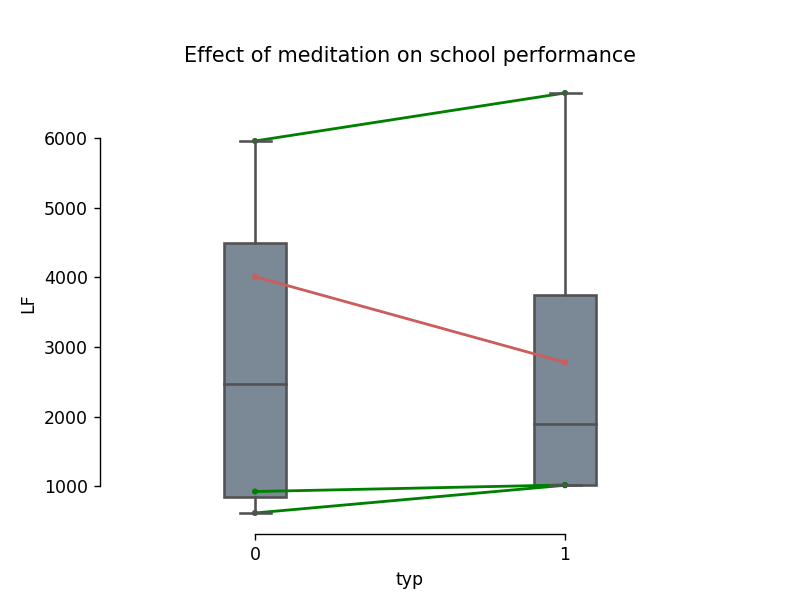

In [91]:
plt.figure()
ax = pg.plot_paired(data=df_new, dv='LF', within='typ', subject='osoba_pomiar')
ax.set_title("Effect of meditation on school performance")
plt.show()

<IPython.core.display.Javascript object>


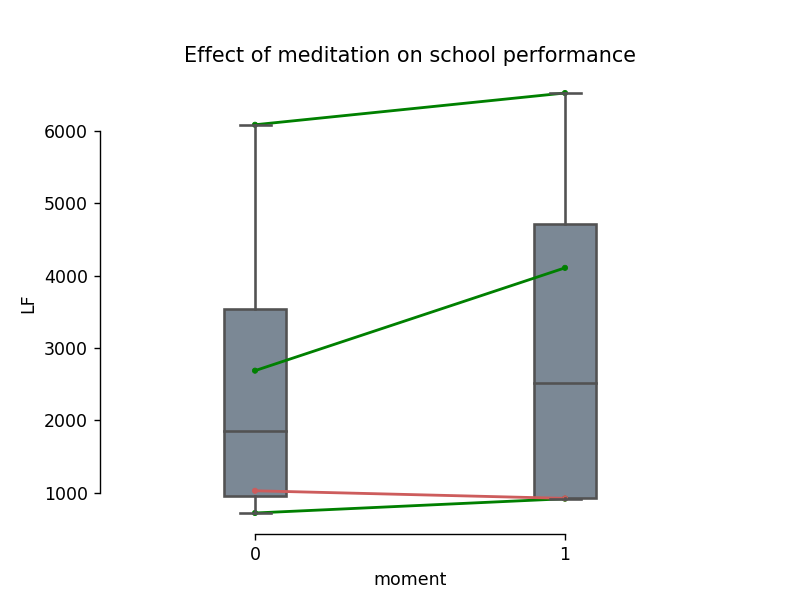

In [92]:
plt.figure()
ax = pg.plot_paired(data=df_new, dv='LF', within='moment', subject='osoba_pomiar')
ax.set_title("Effect of meditation on school performance")
plt.show()

<IPython.core.display.Javascript object>


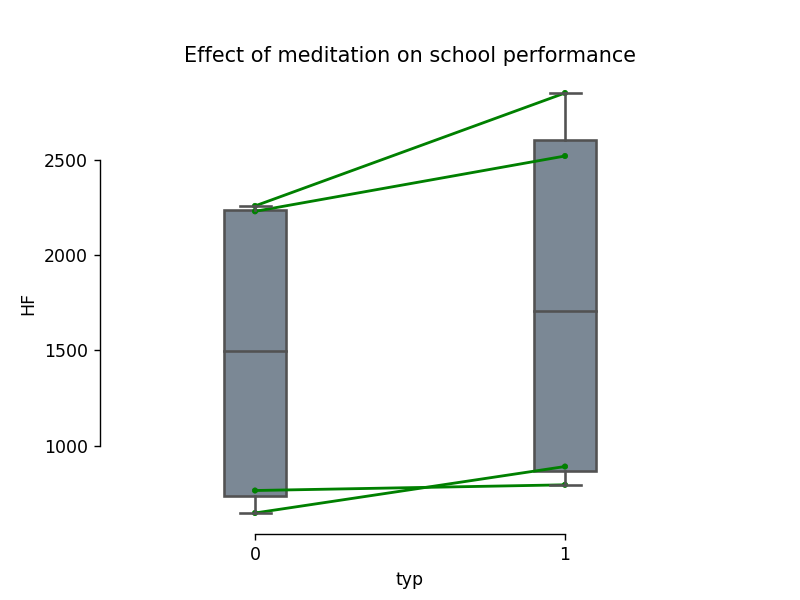

In [99]:
plt.figure()
ax = pg.plot_paired(data=df_new, dv='HF', within='typ', subject='osoba_pomiar')
ax.set_title("Effect of meditation on school performance")
plt.show()

<IPython.core.display.Javascript object>


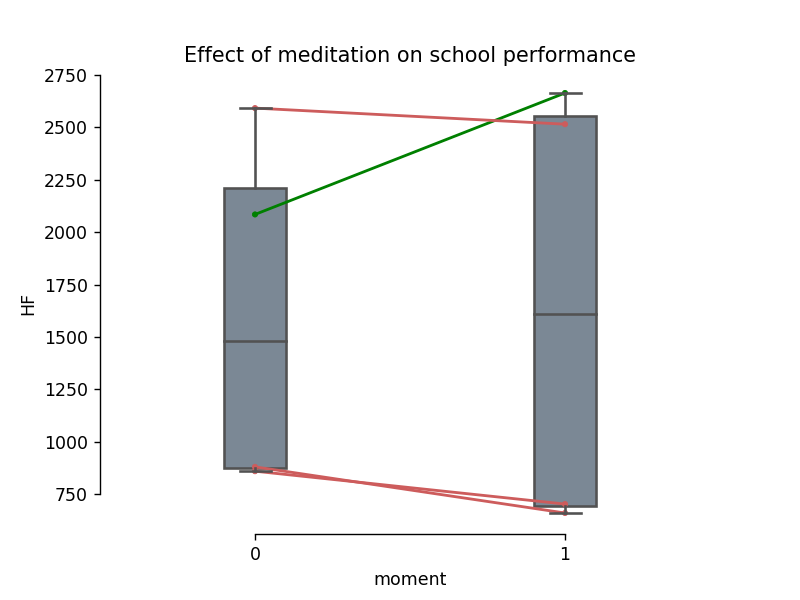

In [100]:
plt.figure()
ax = pg.plot_paired(data=df_new, dv='HF', within='moment', subject='osoba_pomiar')
ax.set_title("Effect of meditation on school performance")
plt.show()

<IPython.core.display.Javascript object>


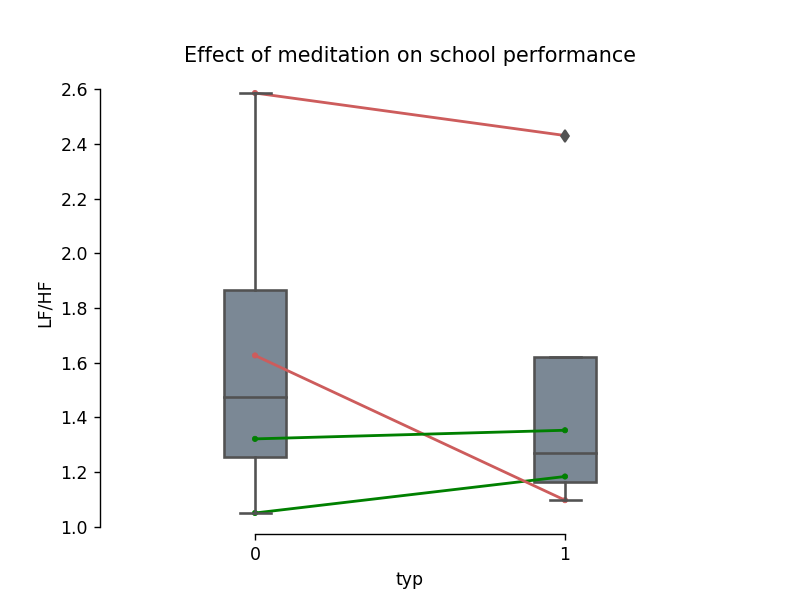

In [95]:
plt.figure()
ax = pg.plot_paired(data=df_new, dv='LF/HF', within='typ', subject='osoba_pomiar')
ax.set_title("Effect of meditation on school performance")
plt.show()

<IPython.core.display.Javascript object>


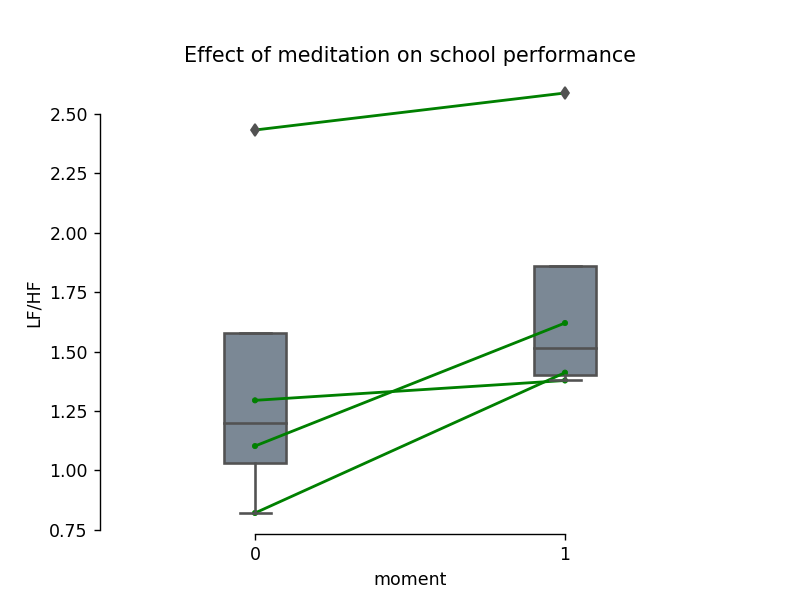

In [96]:
plt.figure()
ax = pg.plot_paired(data=df_new, dv='LF/HF', within='moment', subject='osoba_pomiar')
ax.set_title("Effect of meditation on school performance")
plt.show()